# Avocado Project

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the avocardo dataset
df=pd.read_csv("avocado.csv",index_col=0 )
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Loading the avacado file and reading it in a dataframe.

The dataframe has 14 columns which contains boths features and target variable.
In task 1, Average Price is the target variable which contains continuous data, so it is a regression type problem.
In task 2, we will take "Region" as the target column which has classes, so it is a classification problem.
The dataset contains both numeric as well as categorical data.
As seen in the dataset the column unnamed is there only for index purpose,so we can drop this column.

In [4]:
# checking sample
df.sample(20)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
38,2015-04-05,1.41,1244324.47,20081.53,909664.31,2011.01,312567.62,252129.98,59757.08,680.56,conventional,2015,NewYork
16,2016-09-04,1.38,15106.95,1585.58,5389.10,0.00,8132.27,2064.77,6067.50,0.00,organic,2016,Atlanta
45,2015-02-15,0.83,2926435.94,2146773.46,408395.74,62511.83,308754.91,271596.41,35034.18,2124.32,conventional,2015,LosAngeles
50,2016-01-10,1.17,160432.54,3614.64,110381.20,3921.19,42515.51,38446.60,3621.68,447.23,conventional,2016,GrandRapids
20,2017-08-13,1.39,26155.98,7796.25,22.34,0.00,18337.39,18327.39,10.00,0.00,organic,2017,Houston
35,2016-04-24,1.01,529817.53,173546.78,281110.03,18901.93,56258.79,55978.23,0.00,280.56,conventional,2016,Sacramento
39,2017-04-02,1.38,16511.26,3853.09,4420.79,0.00,8237.38,8098.05,139.33,0.00,organic,2017,PhoenixTucson
15,2017-09-17,2.13,28047.95,123.84,20717.47,0.00,7206.64,7206.64,0.00,0.00,organic,2017,Chicago
30,2015-05-31,1.06,222382.69,10459.41,143893.61,4652.39,63377.28,20976.26,41425.81,975.21,conventional,2015,CincinnatiDayton
36,2016-04-17,0.78,1011265.53,171831.90,285967.94,27995.98,525469.71,59672.84,461184.45,4612.42,conventional,2016,Denver


In [5]:
# Checking the shape of dataset
df.shape

(18249, 13)

The avocardo dataset contains 18249 no of rows and 13 columns

In [6]:
# checking the column names
df.columns.tolist()

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In the avocardo dataset there are 13 columns present which are 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', and
       'region'.

In [7]:
# Checking Datatypes
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
# Changing date column from object type to Date type
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Checking Datatypes
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Now Data type of Date column has been changed to datetime datatype.

In [10]:
# Extracting days and months from date column.
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
# now we need to drop tha Date Column
df.drop("Date",axis=1,inplace=True)

In [12]:
#Checking sample of the data
df.sample(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
24,1.13,5451636.92,2747299.98,1923893.11,157478.05,622965.78,601358.64,18032.41,3574.73,conventional,2015,California,7,12
45,1.48,3302.62,1163.01,29.61,0.00,2110.00,2110.00,0.00,0.00,organic,2016,Tampa,2,14
15,0.87,47076.79,14889.88,28.98,0.00,32157.93,32087.93,70.00,0.00,organic,2016,Houston,9,11
6,0.97,43167806.09,15870677.70,11541844.87,652856.58,15102426.94,10844852.22,4023485.04,234089.68,conventional,2018,TotalUS,2,11
3,0.63,1164027.22,731182.01,187418.51,11915.51,233511.19,117120.79,115108.46,1281.94,conventional,2016,PhoenixTucson,12,4
9,1.70,176815.66,3060.61,48813.20,0.00,124638.82,107070.18,17568.64,0.00,organic,2017,GreatLakes,10,29
17,1.88,9085.45,1986.05,6676.52,0.00,422.88,422.88,0.00,0.00,organic,2015,SanDiego,8,30
2,1.02,249444.49,119801.00,6013.84,404.77,123224.88,99130.17,19950.02,4144.69,conventional,2018,StLouis,3,11
11,0.90,640331.58,87081.69,301656.56,15431.19,236162.14,234219.02,0.00,1943.12,conventional,2015,Seattle,10,11
4,1.74,6539.69,838.75,2060.12,0.00,3640.82,3634.77,6.05,0.00,organic,2016,LasVegas,11,27


In [13]:
# Checking Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 2.1+ MB
None


The dataset contains 18249 entities (rows) and 14 columns. in the non null count column we can see that the count of non null value is same foe each column which indicates that there no missing value present in the dataset. Dtype shows the datatype of each column. There are 9 column having float data, 3 column having integer data, and 2 column having objective data.

In [14]:
# Checking for null value
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

There is no null value present in the dataset.

<AxesSubplot:>

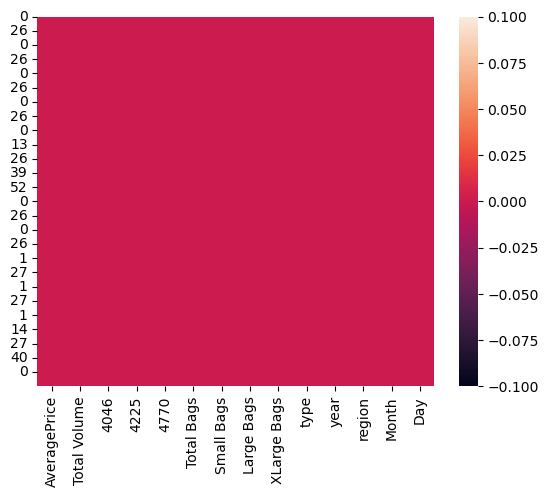

In [18]:
# Visualizing null values using heatmap
sns.heatmap(df.isnull())

We can visualize that there is no missing value present in the dataset.

In [19]:
# Checking the number of unique values
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

Hate we can see that the number of unique value in type, year, region is less which indicates that these column are categorical column.

In [20]:
for i in df.columns:
    print(i,"\n",df[i].unique(),'\n')

AveragePrice 
 [1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 1.12 1.31 1.11 1.34
 1.45 1.05 1.37 1.27 1.32 1.23 1.19 1.43 1.2  1.22 1.13 1.16 1.06 1.17
 1.24 0.96 1.   1.09 0.95 0.97 1.15 1.01 1.14 1.1  1.04 1.03 1.18 1.29
 1.25 0.71 0.94 0.91 1.39 1.4  1.36 1.3  1.54 1.59 1.56 1.38 1.49 1.5
 1.47 1.42 1.41 1.44 1.52 0.9  0.87 0.78 0.92 0.83 0.88 0.84 0.85 1.21
 0.79 0.89 0.86 0.8  0.82 0.74 0.81 0.77 0.75 0.65 0.73 0.68 0.72 0.67
 0.76 0.62 0.7  0.66 1.46 0.49 0.53 0.56 0.6  0.58 0.54 0.52 0.51 0.57
 0.63 0.64 0.61 1.48 1.55 1.58 1.53 1.57 1.51 0.69 1.62 1.63 1.61 1.6
 1.73 1.8  1.86 1.85 1.69 1.66 1.65 1.64 1.67 1.68 1.82 2.07 1.84 1.83
 1.7  1.72 1.81 1.78 0.59 1.9  1.93 1.99 1.95 1.89 1.76 1.71 1.74 0.55
 1.79 1.75 1.94 2.2  1.87 1.77 2.06 2.11 2.22 2.14 2.15 2.02 2.   1.88
 1.96 2.19 2.09 1.98 1.97 1.92 2.04 0.46 2.01 2.08 2.03 2.05 2.28 2.35
 2.29 1.91 2.18 2.24 2.12 2.13 2.16 2.32 2.34 2.33 2.31 2.23 2.27 2.3
 2.41 2.36 2.37 2.39 2.42 2.45 2.38 2.4  2.25 2.26 2.17 2.21 2.1 

Hare we can observe all unique value present in the data set. in this operation we can confirm that there is no missing value present.

In [21]:
# looking for value and its countings in each column
for i in df.columns:
    print(df[i].value_counts(),"\n")

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64 

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64 

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64 

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64 

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name

In the value count process we can notice the unique value with its countings. Hare we can notice that there is no missing value present but in some column like PLU4046, PLU4225, PLU4770, Total Bags, Small Bags, Large Bags, XLarge Bags there are 0 value present. the counting of region for each region is same which refers to the balanced dataset.

In [22]:
# checking missing value
missing_data=(df[df.columns.tolist()[0:len(df.columns.tolist())]]==0).sum()
missing_data

AveragePrice        0
Total Volume        0
4046              242
4225               61
4770             5497
Total Bags         15
Small Bags        159
Large Bags       2370
XLarge Bags     12048
type                0
year                0
region              0
Month               0
Day                 0
dtype: int64

In [23]:
# Checking dataset those have PLU4046 value 0.
df[df['4046']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
4,1.94,831.69,0.0,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany,11,29
41,1.63,1777.09,0.0,1209.68,0.0,567.41,366.67,200.74,0.0,organic,2015,Boise,3,15
47,1.43,1780.76,0.0,999.31,0.0,781.45,283.33,498.12,0.0,organic,2015,Boise,2,1
50,1.44,2378.68,0.0,1923.40,0.0,455.28,170.00,285.28,0.0,organic,2015,Boise,1,11
0,1.47,5043.15,0.0,166.37,0.0,4876.78,2751.87,2124.91,0.0,organic,2015,BuffaloRochester,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1.54,3737.85,0.0,1199.91,0.0,2537.94,1769.94,768.00,0.0,organic,2018,Louisville,1,14
5,1.58,29699.89,0.0,195.20,0.0,29504.69,29504.69,0.00,0.0,organic,2018,NorthernNewEngland,2,18
6,1.39,22495.69,0.0,176.23,0.0,22319.46,22319.46,0.00,0.0,organic,2018,NorthernNewEngland,2,11
8,1.29,50288.63,0.0,383.92,0.0,49904.71,49904.71,0.00,0.0,organic,2018,NorthernNewEngland,1,28


In [24]:
#Checking PLU4225 column where values are 0
df[df['4225']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
46,1.72,2118.66,945.33,0.0,0.0,1173.33,1173.33,0.00,0.0,organic,2015,MiamiFtLauderdale,2,8
1,1.66,1822.24,470.42,0.0,0.0,1351.82,1351.82,0.00,0.0,organic,2015,NewOrleansMobile,12,20
2,1.60,1529.16,424.70,0.0,0.0,1104.46,1104.46,0.00,0.0,organic,2015,NewOrleansMobile,12,13
3,1.35,2211.53,294.65,0.0,0.0,1916.88,1916.88,0.00,0.0,organic,2015,NewOrleansMobile,12,6
4,1.58,2041.47,221.95,0.0,0.0,1819.52,1812.85,6.67,0.0,organic,2015,NewOrleansMobile,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,1.33,6425.79,254.69,0.0,0.0,6171.10,5927.54,243.56,0.0,organic,2017,NewOrleansMobile,2,12
48,1.30,2939.28,129.28,0.0,0.0,2810.00,1861.27,948.73,0.0,organic,2017,NewOrleansMobile,1,29
51,1.26,5077.97,189.58,0.0,0.0,4888.39,3309.59,1578.80,0.0,organic,2017,NewOrleansMobile,1,8
27,1.54,2406.34,165.75,0.0,0.0,2240.59,2226.75,13.84,0.0,organic,2017,Pittsburgh,6,25


In [25]:
# Checking dataset those have PLU4770 value 0.
df[df['4770']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
34,0.63,82585.83,32240.97,3928.02,0.0,46416.84,46257.90,140.79,18.15,conventional,2016,Boise,5,1
0,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.00,organic,2015,Albany,12,27
1,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.00,organic,2015,Albany,12,20
2,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.00,organic,2015,Albany,12,13
3,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.00,organic,2015,Albany,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.57,18421.24,1974.26,2482.65,0.0,13964.33,13698.27,266.06,0.00,organic,2018,WestTexNewMexico,2,25
5,1.56,17597.12,1892.05,1928.36,0.0,13776.71,13553.53,223.18,0.00,organic,2018,WestTexNewMexico,2,18
6,1.57,15986.17,1924.28,1368.32,0.0,12693.57,12437.35,256.22,0.00,organic,2018,WestTexNewMexico,2,11
7,1.63,17074.83,2046.96,1529.20,0.0,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico,2,4


In [26]:
# Checking Total bags where its value is 0
df[df['Total Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
34,2.03,3976.19,1325.62,2650.57,0.00,0.0,0.0,0.0,0.0,organic,2015,Atlanta,5,3
26,1.53,41116.32,7314.21,33780.38,21.73,0.0,0.0,0.0,0.0,organic,2015,Portland,6,28
10,2.79,12642.11,961.55,11680.56,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco,10,18
11,2.66,14031.73,1046.84,12984.89,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco,10,11
23,2.36,19558.81,3893.65,15665.16,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco,7,19
37,1.54,28220.45,18887.66,9332.79,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco,4,12
38,1.55,26530.70,17104.69,9426.01,0.00,0.0,0.0,0.0,0.0,organic,2015,SanFrancisco,4,5
25,1.98,29929.57,8841.34,20807.76,280.47,0.0,0.0,0.0,0.0,organic,2015,Seattle,7,5
26,1.71,46229.47,8112.46,37972.31,144.70,0.0,0.0,0.0,0.0,organic,2015,Seattle,6,28
24,2.07,2786.45,680.60,2105.85,0.00,0.0,0.0,0.0,0.0,organic,2015,Spokane,7,12


In [27]:
# Checking Small Bags where its value is 0
df[df['Small Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
11,1.75,7279.83,2387.77,3377.79,0.0,1514.27,0.0,1514.27,0.0,organic,2015,Atlanta,10,11
12,1.79,7423.50,2743.66,3550.81,0.0,1129.03,0.0,1129.03,0.0,organic,2015,Atlanta,10,4
13,2.01,5392.63,2232.51,3021.00,0.0,139.12,0.0,139.12,0.0,organic,2015,Atlanta,9,27
14,2.04,5705.15,2378.64,3304.23,0.0,22.28,0.0,22.28,0.0,organic,2015,Atlanta,9,20
25,1.50,5744.26,1577.43,2748.05,0.0,1418.78,0.0,1418.78,0.0,organic,2015,Atlanta,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,1.69,2401.84,75.14,1380.50,0.0,946.20,0.0,946.20,0.0,organic,2016,Spokane,1,3
34,1.30,5153.05,1408.40,528.99,0.0,3215.66,0.0,3215.66,0.0,organic,2016,StLouis,5,1
36,1.21,4042.51,1101.45,422.83,0.0,2518.23,0.0,2518.23,0.0,organic,2016,StLouis,4,17
50,1.62,6291.29,1129.49,3582.50,0.0,1579.30,0.0,1579.30,0.0,organic,2017,Atlanta,1,15


In [28]:
# Checking Large Bags where its value is 0
df[df['Large Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
3,0.71,95295.34,35590.98,12526.50,4086.26,43091.60,42734.53,0.0,357.07,conventional,2015,Boise,12,6
4,1.06,49069.13,24189.98,2789.67,6031.49,16057.99,15860.63,0.0,197.36,conventional,2015,Boise,11,29
8,1.14,53585.51,30434.99,4359.52,6428.27,12362.73,12331.82,0.0,30.91,conventional,2015,Boise,11,1
9,1.11,59874.45,29521.58,10089.82,6551.57,13711.48,13660.98,0.0,50.50,conventional,2015,Boise,10,25
10,1.16,54191.14,29614.23,9069.38,6586.27,8921.26,8918.00,0.0,3.26,conventional,2015,Boise,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2.27,20325.75,9368.06,8808.80,0.00,2148.89,2148.89,0.0,0.00,organic,2018,SanFrancisco,1,28
9,1.36,27919.45,13037.67,11998.44,0.00,2883.34,2883.34,0.0,0.00,organic,2018,SanFrancisco,1,21
10,1.32,37347.89,19301.15,14957.23,0.00,3089.51,3089.51,0.0,0.00,organic,2018,SanFrancisco,1,14
11,2.30,20151.24,10165.34,8042.56,0.00,1943.34,1943.34,0.0,0.00,organic,2018,SanFrancisco,1,7


In [29]:
# Checking Total bags where its value is 0
df[df['XLarge Bags']==0]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


From all of the columns those value is 0 is shown in the dataframe. Hare we have seen that the value which are 0 that value will be 0 in actual senario as all those value are taken from the retailers cash register based on actual retail sales of Hass avocados. Hence we need not to change those value by replacing with mean or median values of themselves. If we carefully look in to the dataset we will found that total bags is the sum of all kind of bags used during sale. if we replace those zero value with mean or median then we will found that the total no of bag is not equal to the sum of the all kind of bag. Hence There will be a big trouble if we replace those zero values.

In [30]:
#  Checking Basic Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

1. The counts of all the columns are same which means there are no null values present in the daaset.
2. The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.
3. The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.
4. The mean is greater than the median in most of the columns which means they are skewed to right.
5. In some of the columns median is greater than the mean, hence they are skewed to left.
6. Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.
7. By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.
8. Before visualizing the data let's separate the categorical and numerical columns.

In [31]:
# Checking for Categorical columns
Categorical_col = []
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Categorical_col.append(i)
    elif df.dtypes[i]!='object':
        numerical_col.append(i)
print('Categorical Columns :',Categorical_col)
print("Numerical Columns :",numerical_col)

Categorical Columns : ['type', 'region']
Numerical Columns : ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# Data Visualization

### Univariate Analysis

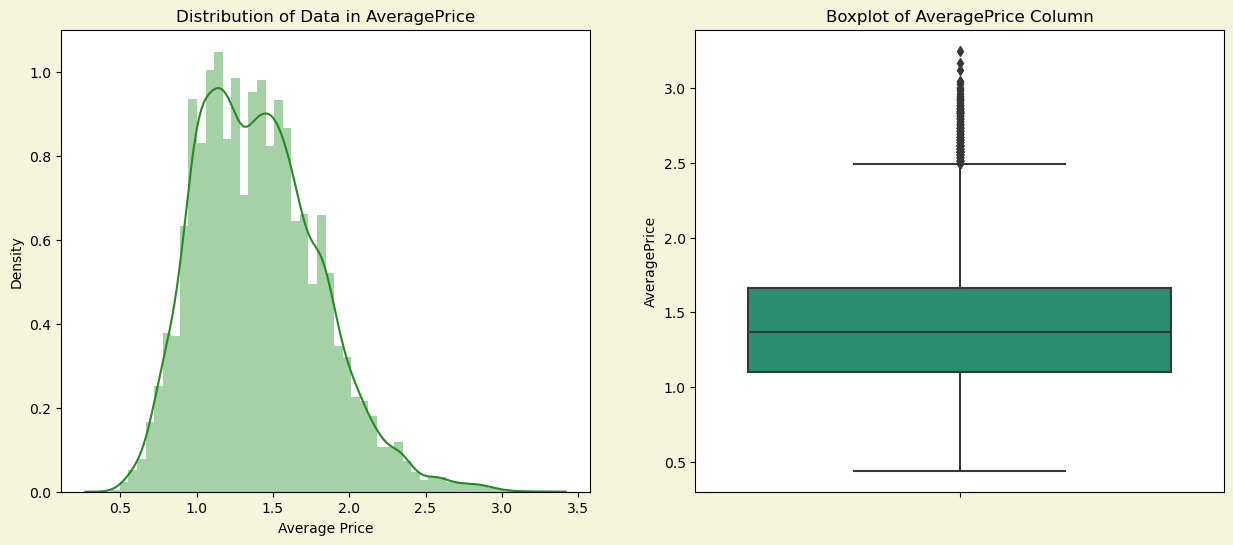

In [32]:
# Checking distribution of data in Average price column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['AveragePrice'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in AveragePrice")
plt.xlabel("Average Price")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='AveragePrice', data=df, palette='Dark2')
plt.title("Boxplot of AveragePrice Column")
plt.ylabel("AveragePrice")
plt.show()

Average Price Column is normally distributed. Outliers are present in the Average price column.

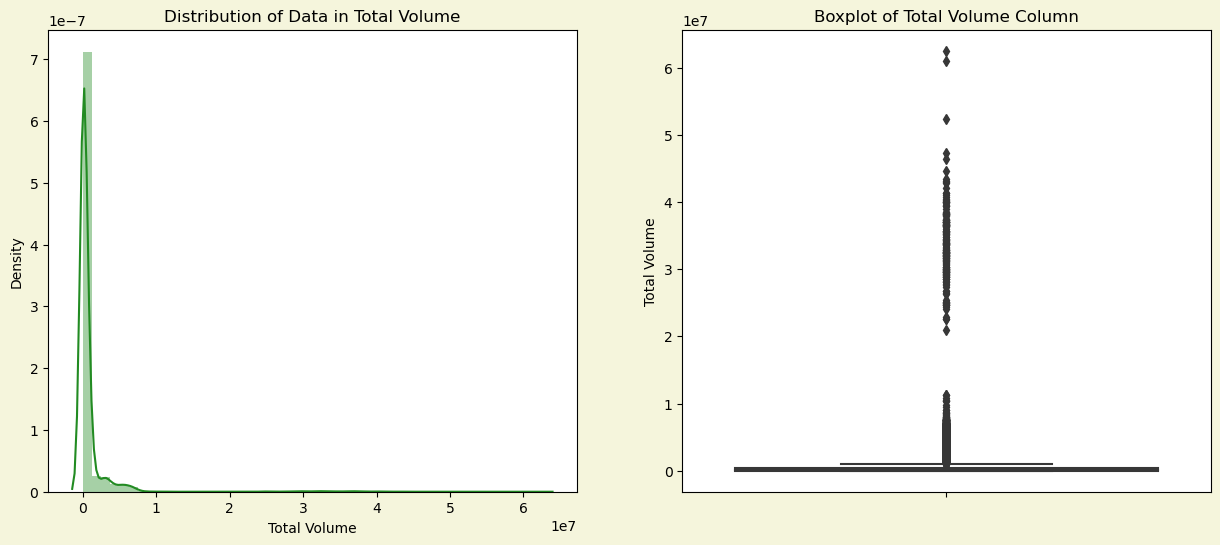

In [33]:
# Checking distribution of data in Total Volume column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['Total Volume'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in Total Volume")
plt.xlabel("Total Volume")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='Total Volume', data=df, palette='Dark2')
plt.title("Boxplot of Total Volume Column")
plt.ylabel("Total Volume")
plt.show()

Total Volumn Column is not normally distributed. right tailed skewness is present in the Total Volume column also huge amount of outliers data is present in the dataset.

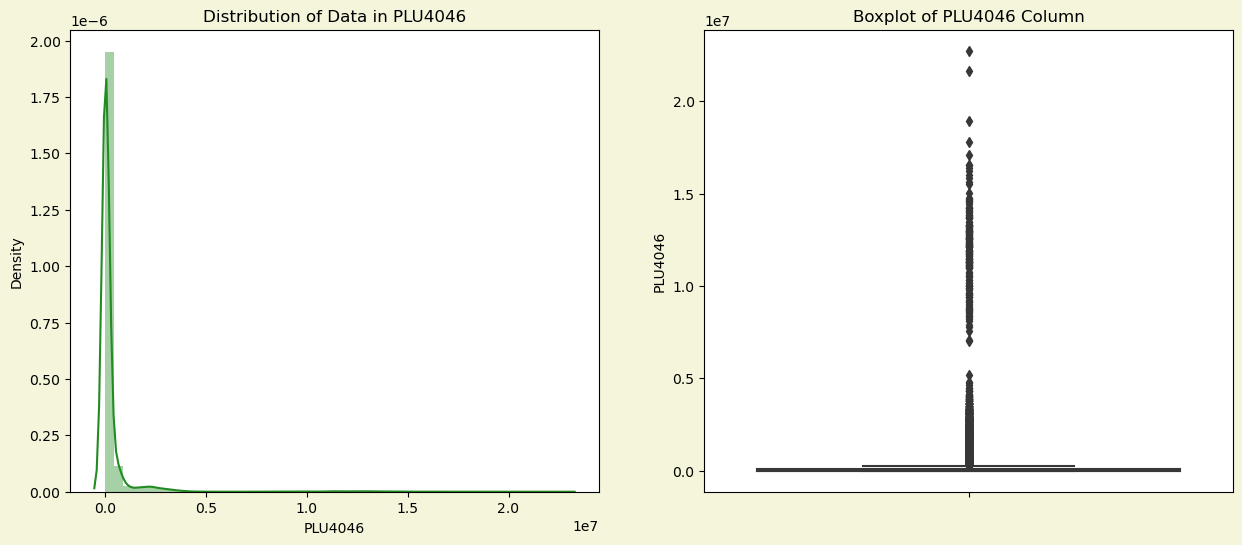

In [24]:
# Checking distribution of data in PLU4046 column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['4046'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in PLU4046")
plt.xlabel("PLU4046")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='4046', data=df, palette='Dark2')
plt.title("Boxplot of PLU4046 Column")
plt.ylabel("PLU4046")
plt.show()

PLU4046 column is not normally distributed. Right tailed skewness and huge outliers is present in the dataset.

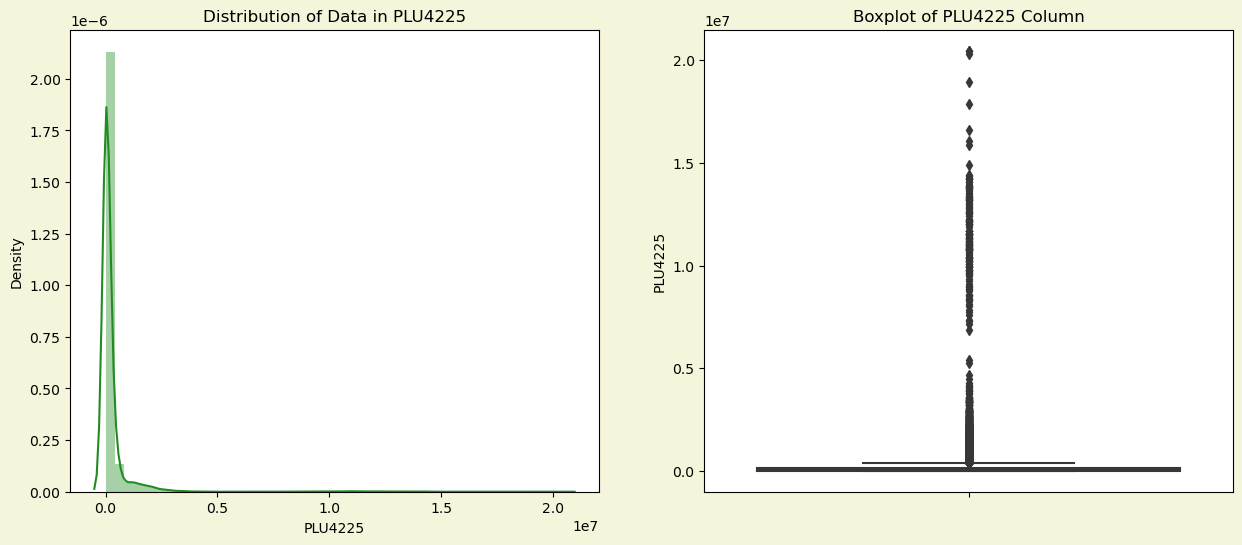

In [25]:
# Checking distribution of data in PLU4225 column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['4225'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in PLU4225")
plt.xlabel("PLU4225")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='4225', data=df, palette='Dark2')
plt.title("Boxplot of PLU4225 Column")
plt.ylabel("PLU4225")
plt.show()


PLU4225 is not normally distributed. Right tailed skewness and huge outliers is present in the dataset.

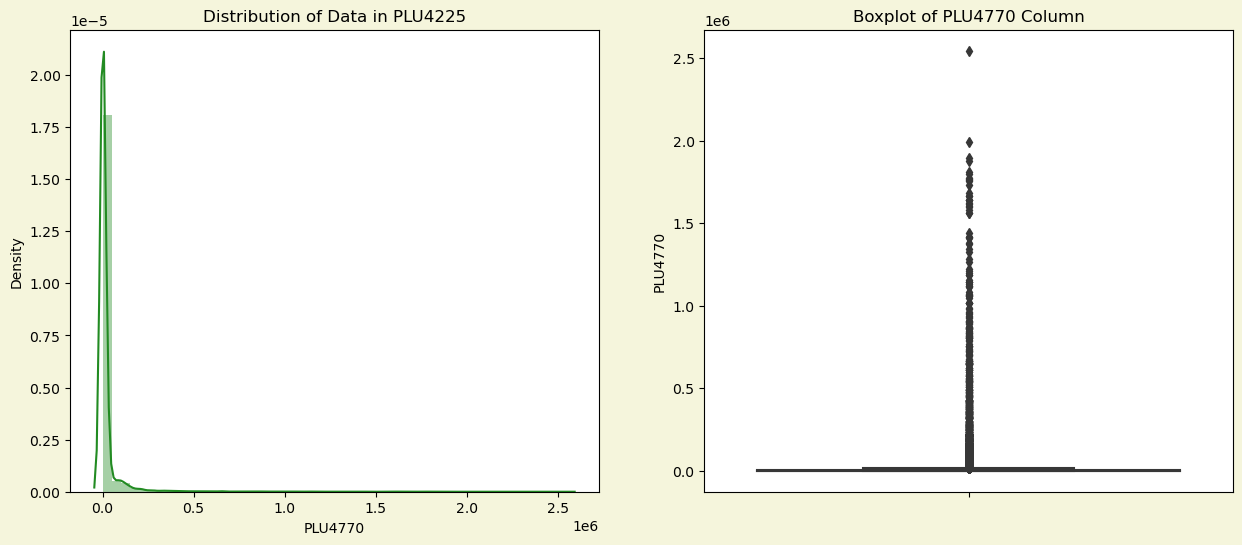

In [26]:
# Checking distribution of data in PLU4770 column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['4770'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in PLU4225")
plt.xlabel("PLU4770")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='4770', data=df, palette='Dark2')
plt.title("Boxplot of PLU4770 Column")
plt.ylabel("PLU4770")
plt.show()

PLU4770 is not normally distributed. Right tailed skewness and huge outliers is present in the dataset.

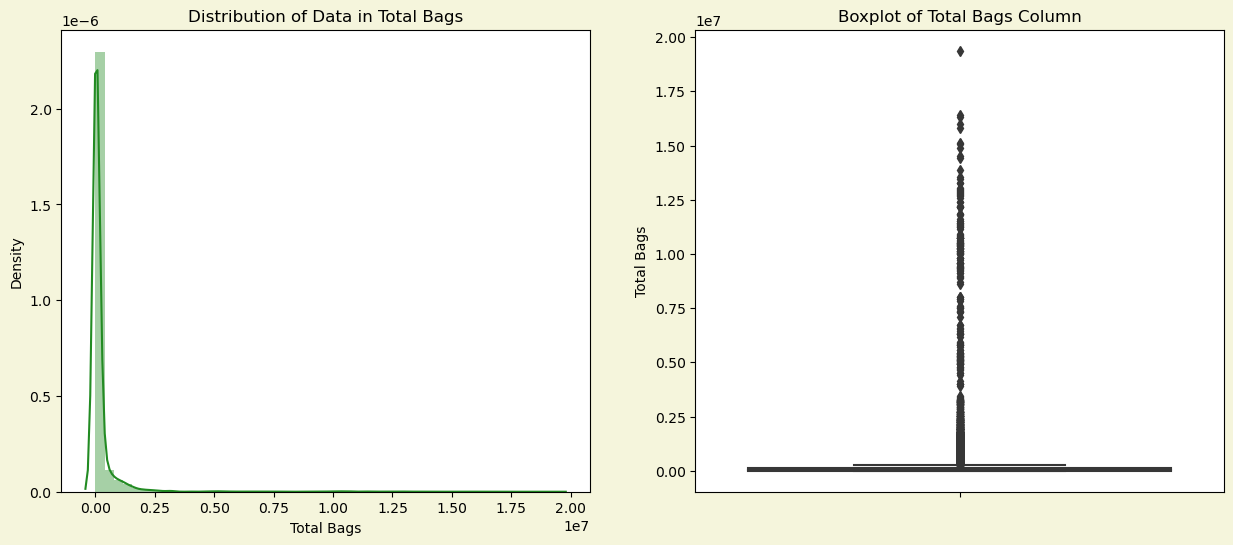

In [27]:
# Checking distribution of data in Total Bags column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['Total Bags'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in Total Bags")
plt.xlabel("Total Bags")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='Total Bags', data=df, palette='Dark2')
plt.title("Boxplot of Total Bags Column")
plt.ylabel("Total Bags")
plt.show()

Total Bags is not normally distributed. Right tailed skewness and huge outliers is present in the dataset.

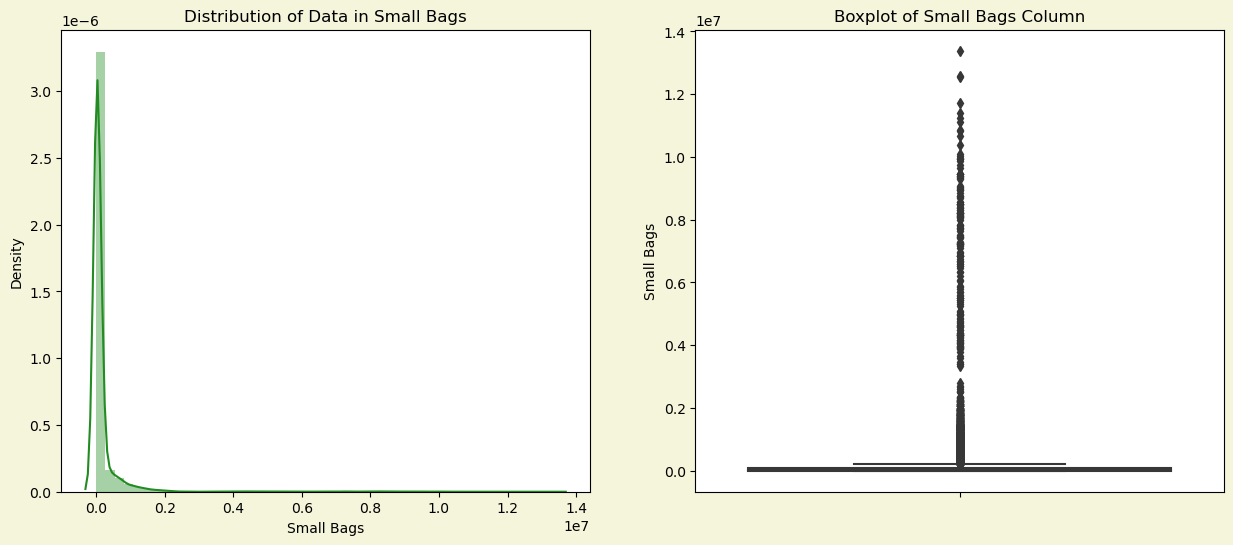

In [28]:
# Checking distribution of data in Small Bags column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['Small Bags'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in Small Bags")
plt.xlabel("Small Bags")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='Small Bags', data=df, palette='Dark2')
plt.title("Boxplot of Small Bags Column")
plt.ylabel("Small Bags")
plt.show()

Small Bags is not normally distributed. Right tailed skewness and huge outliers is present in the dataset.

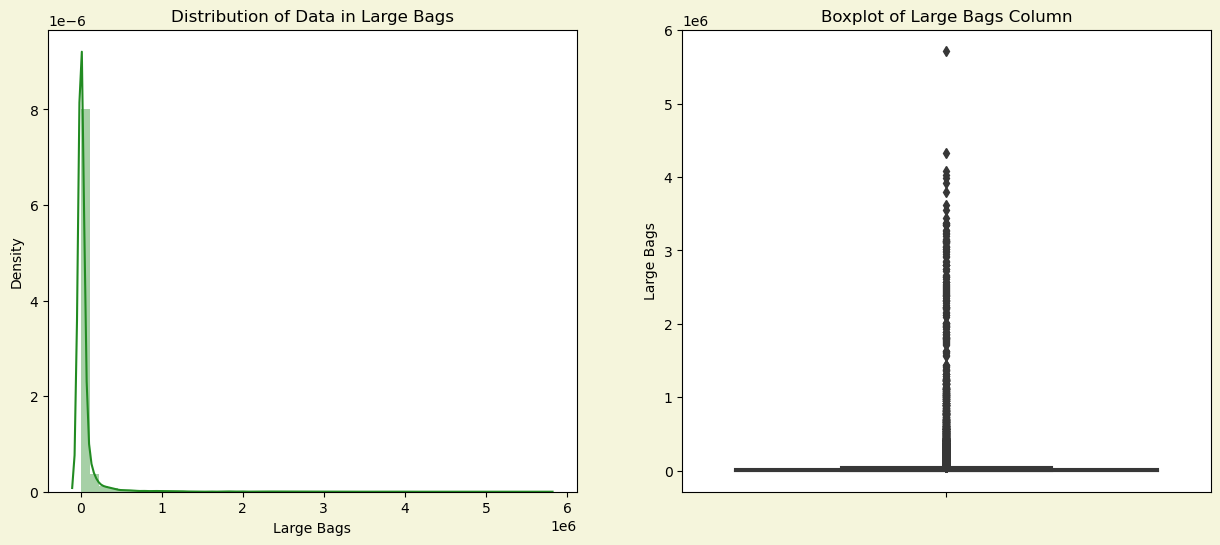

In [29]:
# Checking distribution of data in Large Bags column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['Large Bags'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in Large Bags")
plt.xlabel("Large Bags")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='Large Bags', data=df, palette='Dark2')
plt.title("Boxplot of Large Bags Column")
plt.ylabel("Large Bags")
plt.show()

Large Bags column data is not normally distributed. Right tailed skewness and huge outliers is present in the dataset.

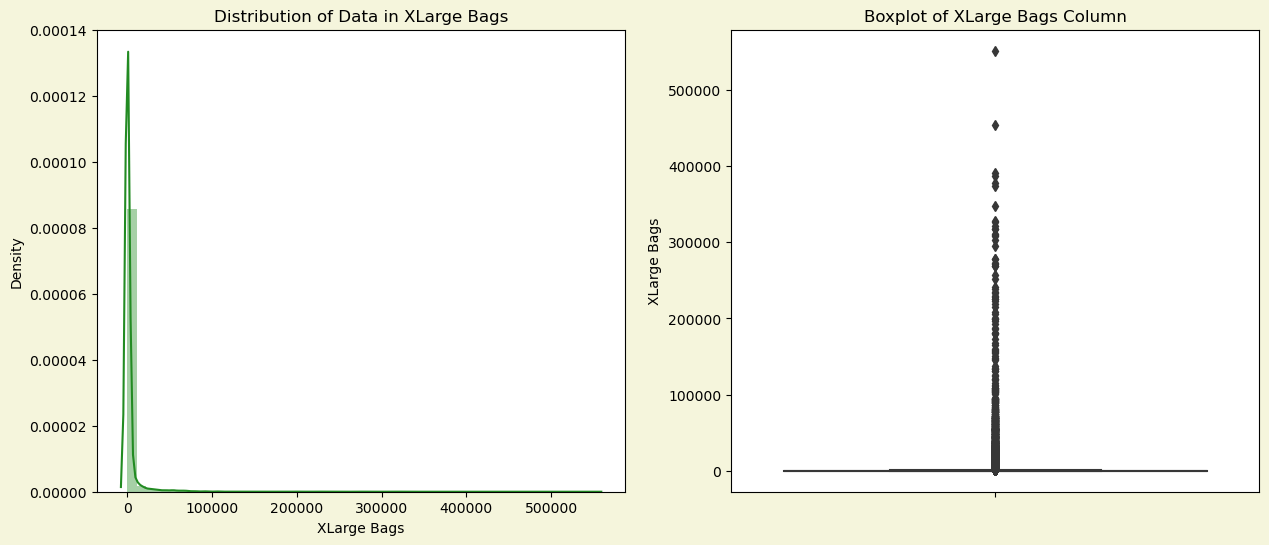

In [30]:
# Checking distribution of data in XLarge Bags column
plt.figure(figsize=(15,6), facecolor='beige')

plt.subplot(1,2,1)
sns.distplot(df['XLarge Bags'], kde=True, hist=True, color='forestgreen')
plt.title("Distribution of Data in XLarge Bags")
plt.xlabel("XLarge Bags")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.boxplot(y='XLarge Bags', data=df, palette='Dark2')
plt.title("Boxplot of XLarge Bags Column")
plt.ylabel("XLarge Bags")
plt.show()

XLarge Bags column data  is not normally distributed. Right tailed skewness and huge outliers is present in the dataset.

conventional    9126
organic         9123
Name: type, dtype: int64


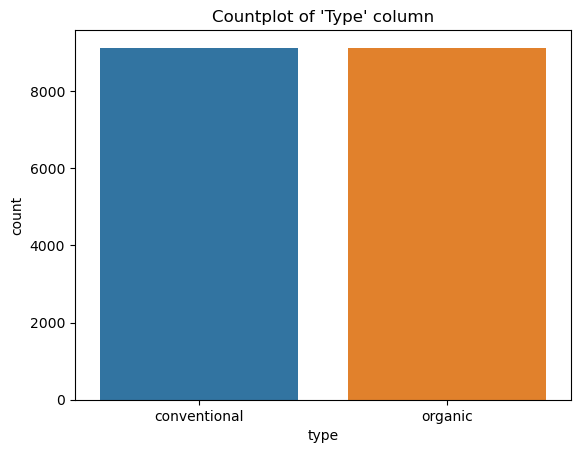

In [35]:
#Visualizing count plot of type column
print(df['type'].value_counts())
plt.title("Countplot of 'Type' column")
sns.countplot(data=df, x='type')
plt.show()

Almost Same no of Data is present in both type of conventional and organic data.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


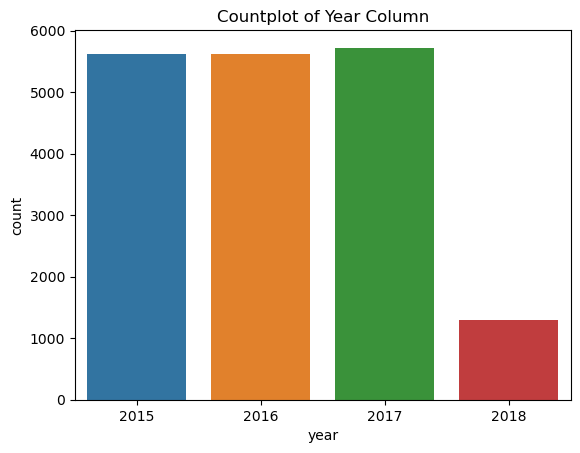

In [36]:
# Count plot of year column
print(df['year'].value_counts())
plt.title("Countplot of Year Column")
sns.countplot(data=df, x='year')
plt.show()

The count of 2017 is bit higher than 2016 and 2015, 2018 has very less in count, which means the price and the sales of avacado is less in 2018 year.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

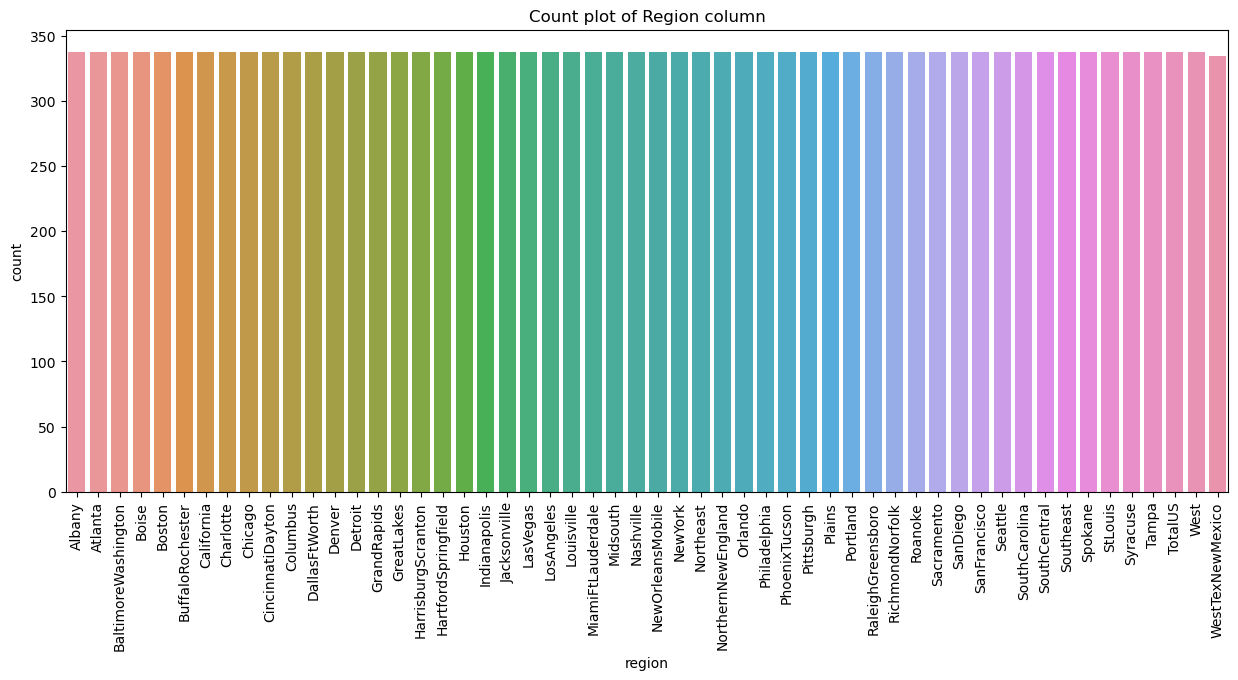

In [37]:
# Count plot of Region column
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
plt.title("Count plot of Region column")
sns.countplot(data=df, x='region')
plt.xticks(rotation=90)
plt.show()

We can observe the count of avacado is almost same in all the regions, all of them have the count338 but WestTestNewMexico has count 335 which is a bit less than other regions. Lets plot the distribution plot to know how the data has been distributed in all the columns.

### Bivariate Analysis

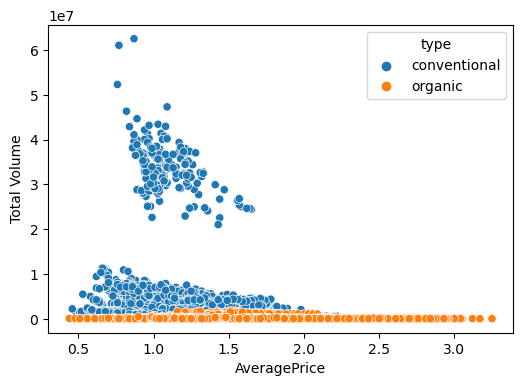

In [43]:
# Checking the AveragePrice vs Total volumn column
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='AveragePrice', y='Total Volume', hue='type')
plt.show()

The scatterplot givces the relationship between the total volume and average price with respect to type. All organic type of avacado lies in the zero volume and the average price is high for organic. The conventional type avacado has total volume 0-4 with the average price upto 2.3. So the Average Price of the organic type with zero volume is more than the conventional type.

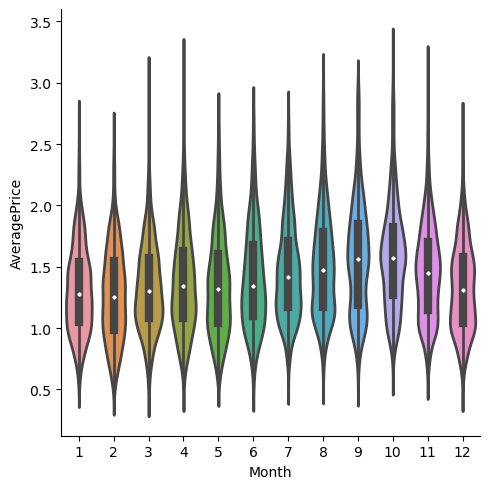

In [38]:
# Checking Month Vs AveragePrice To track the sale
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df, linewidth=2)

From the plot we can say that the AveragePrice remians high during 8th(August month), 9th(September) and 10th(October) month and starts to fall from November onwards Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.

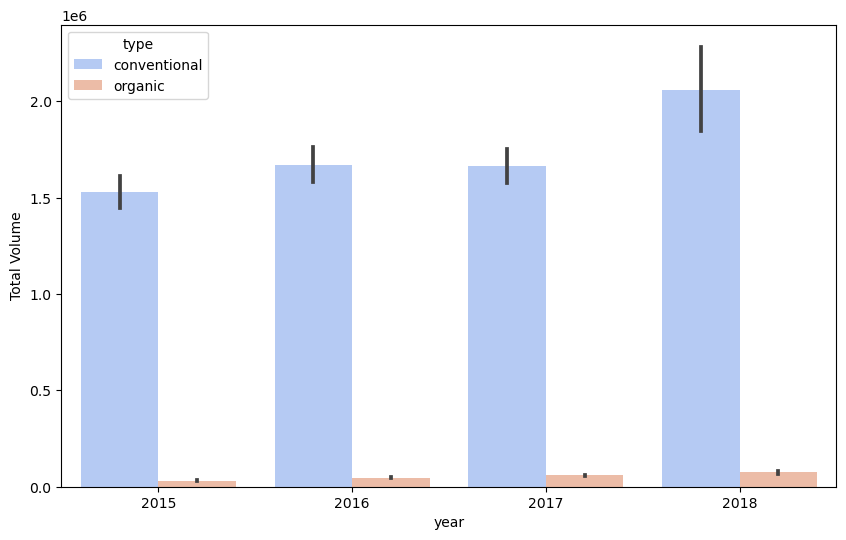

In [39]:

plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

Conventional types were sold higher every year with low price than organic types which means the dem,and for conventional is also high. Also the total sales volume is spotted int he year 2018 and then declined in 2015. The total sales are same in the year 2016 ands 2017.

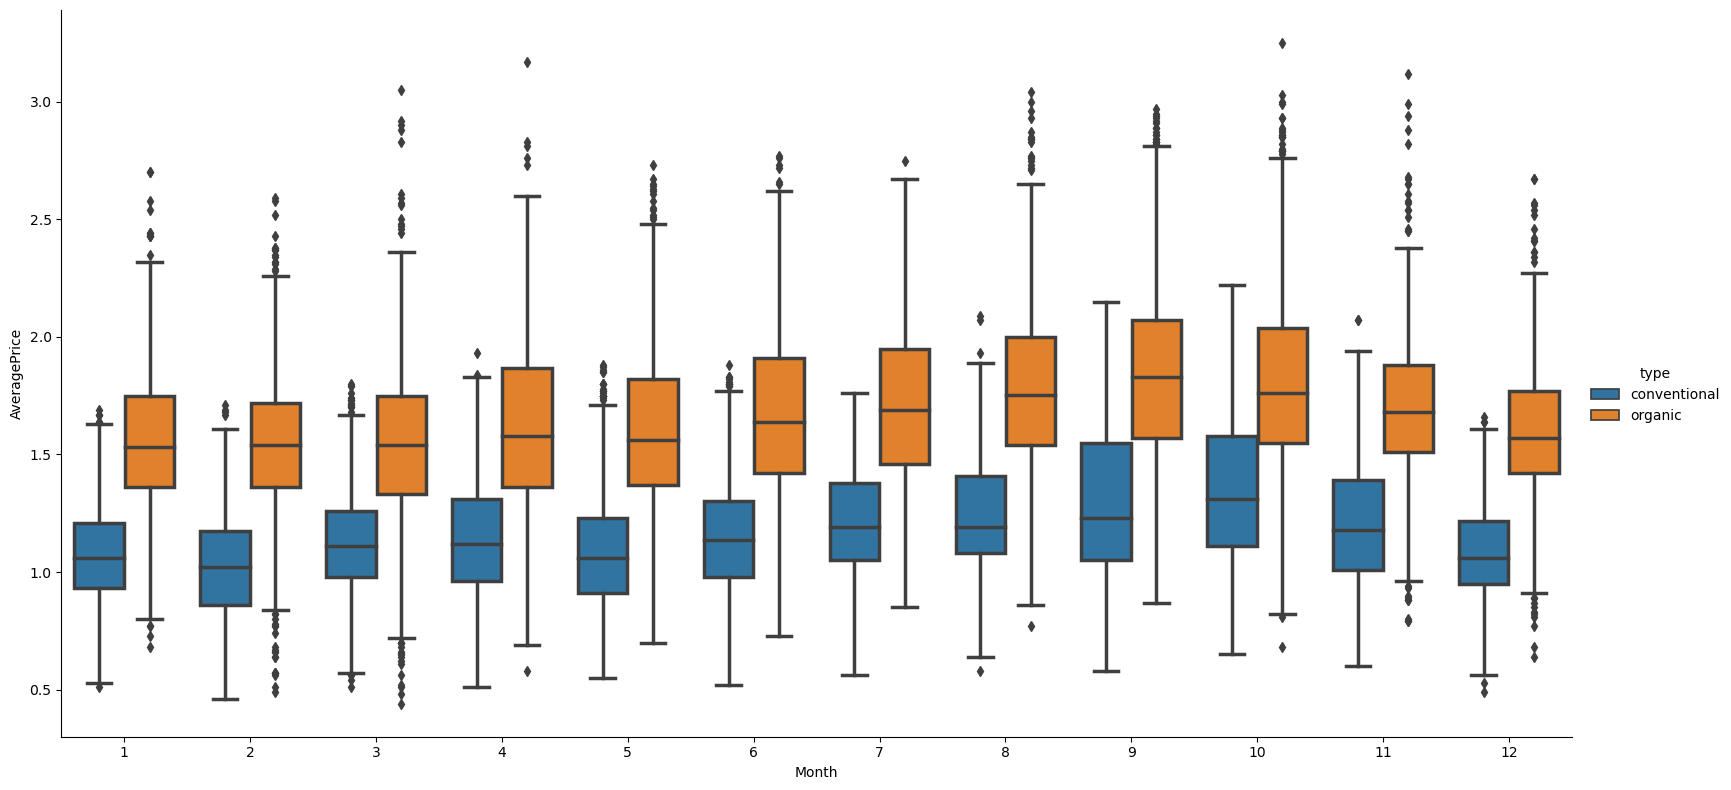

In [40]:
sns.catplot(x='Month', y='AveragePrice', hue='type', kind = 'box', data=df, height=8, linewidth=2.5, aspect=2)

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.

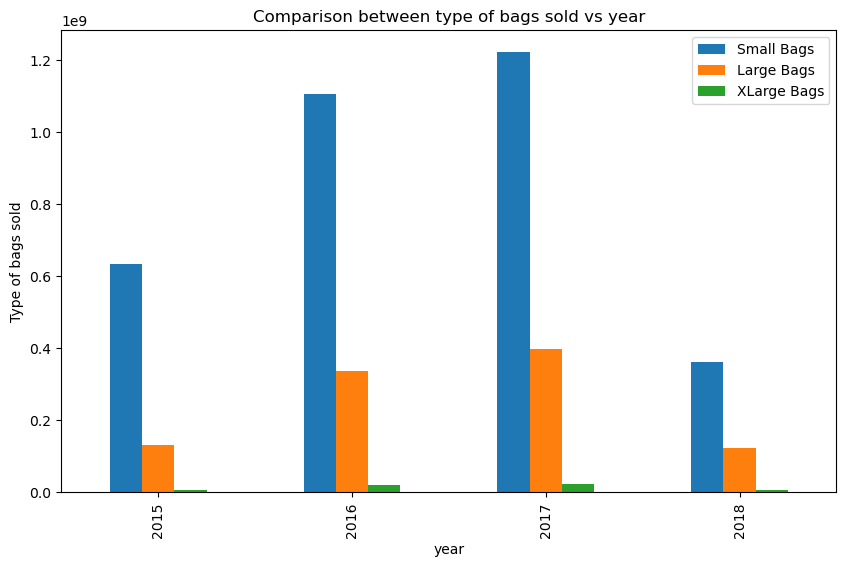

In [41]:
feature = df[['Small Bags','Large Bags','XLarge Bags']].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparison between type of bags sold vs year")
plt.xlabel('year')
plt.ylabel("Type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold.

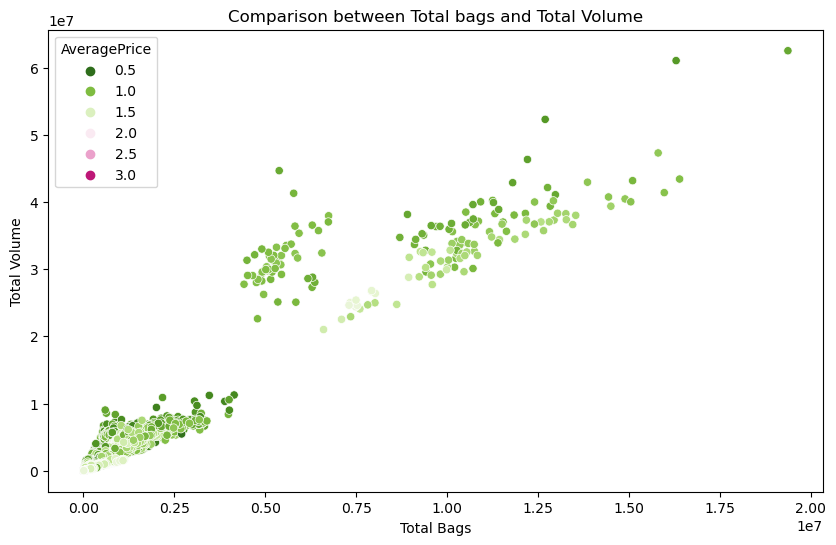

In [42]:
plt.figure(figsize=(10,6))
plt.title("Comparison between Total bags and Total Volume")
sns.scatterplot(data=df,x='Total Bags', y ='Total Volume',hue='AveragePrice',palette='PiYG_r')
plt.show()

We can see a linear relation between the Total bags with Total Volume. As the total bags sales increases with total volume,the price of the avacado also increases.

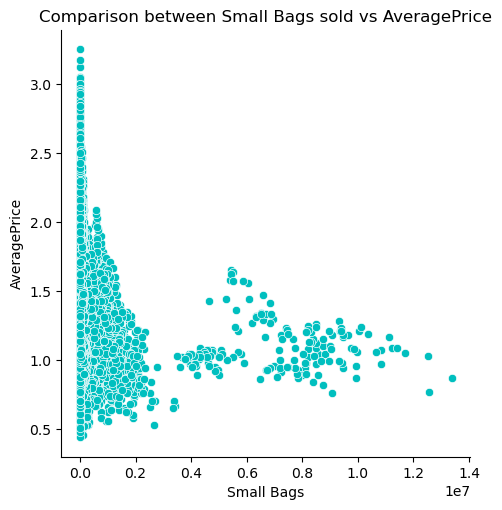

In [44]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color='c')
plt.title("Comparison between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The small Bag size has high average price at first and also from the range 0-0.6,the price of small bag size is almost 1.6.

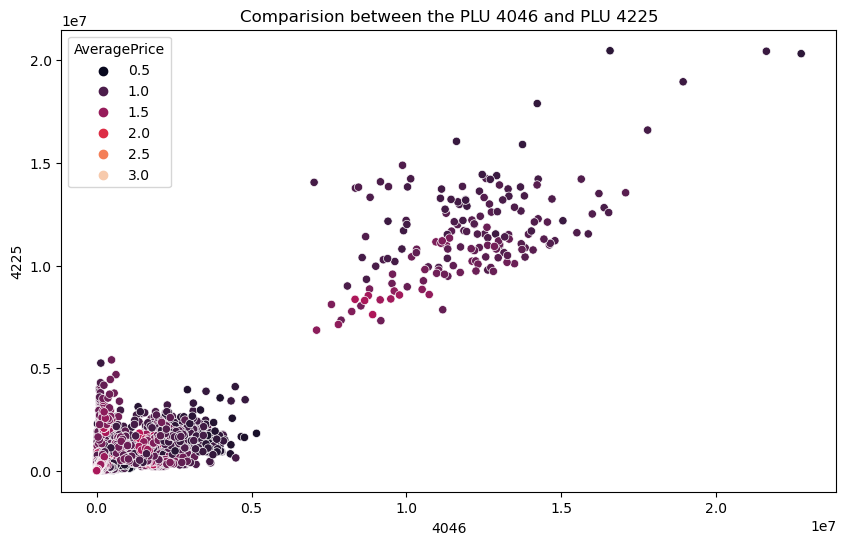

In [45]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

There is a linear relationship between the total number of avacados with PLU 4046 and PLU 4225 sold. The number opf avacados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph.These scatter plots can also be observed in the pairplot.

## Data Preprocessing

### Outliers

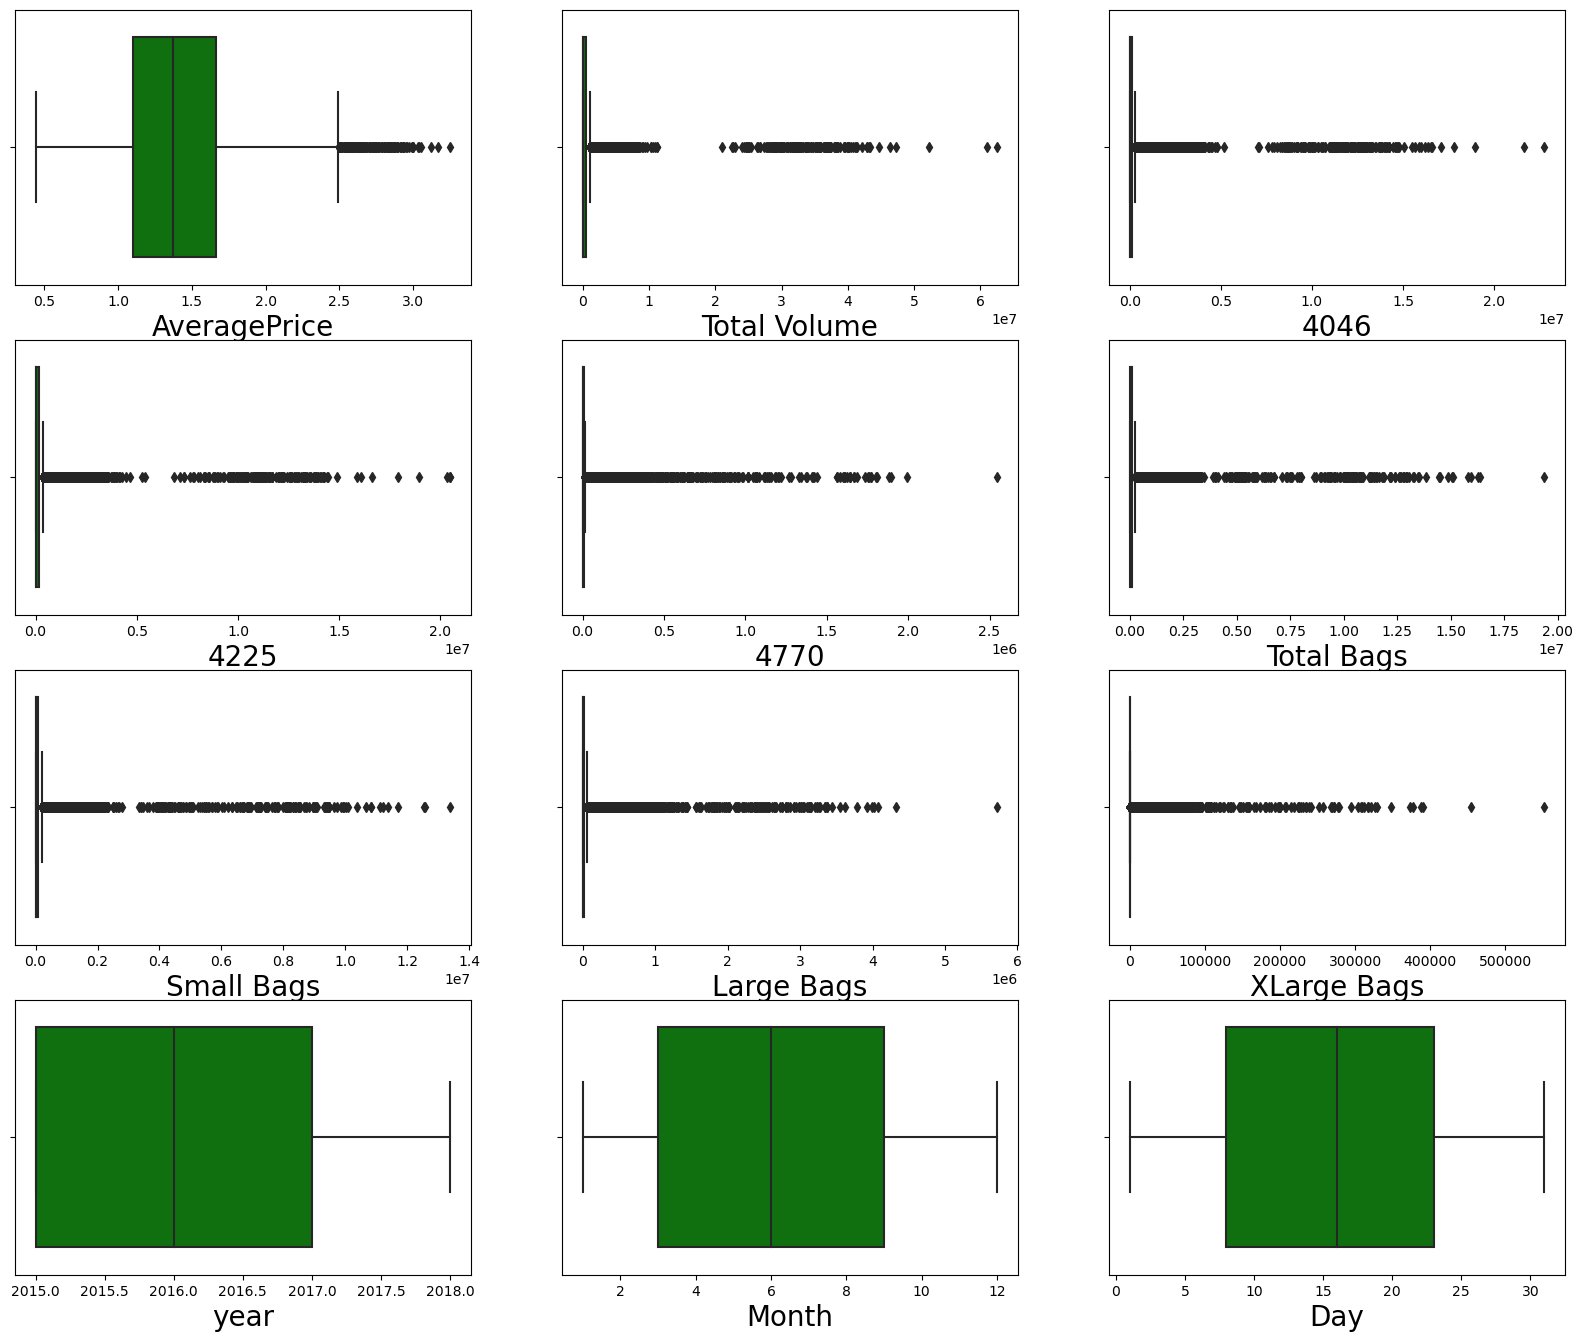

In [46]:
numerical_col = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year','Month','Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

As we can see heavy outliers are present in almost all the columns except year,Month and Day which needs to be removed for futher data processing.Even the label has outliers present but as it is target variable, no need to remove outlier from it.

##### Zscore Method

In [48]:
# Zscore
from scipy.stats import zscore
features = df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z = np.abs(zscore(features))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
7,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
8,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
9,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
10,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [49]:
# Removing Outliers
new_df = df[(z<3).all(axis=1)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [51]:
# Looking the shape of dataset of with and without outliers
print(df.shape)
print(new_df.shape)

(18249, 14)
(17782, 14)


In [53]:
# Loss percentage of data in Zscore method
round((18249-17782)/18429*100,2)

2.53

##### IQR Method

In [54]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1
df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Shape of data
print(df.shape)
print(df1.shape)

(18249, 14)
(11747, 14)


In [55]:
# Checking data loss percentage in IQR method
round((18249-11747)/18249*100,2)

35.63

Using IQR the data loss is quiet high. So we would consider Zscore

##### Skewness

In [56]:
# Checking Skewness
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

All the columns have skewness except year, Month and Day.

In [57]:
# Removing skewness using yeo johnson to get better predictions
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [58]:
# Checking the skewness after applying yeo-johnson method
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

We can see that after applying yeo-johnson method,there is still skewness present in XLarge Bags.So, removing it using log trnsformation

In [59]:
# Removing skewness using log transformation
new_df['XLarge Bags']=np.log1p(new_df['XLarge Bags'])


The skewness has been removed.Lets check it.

In [60]:
# Checking the skewness again
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

So the complete skewness has been removed using log transformation and yeo-johnson method.

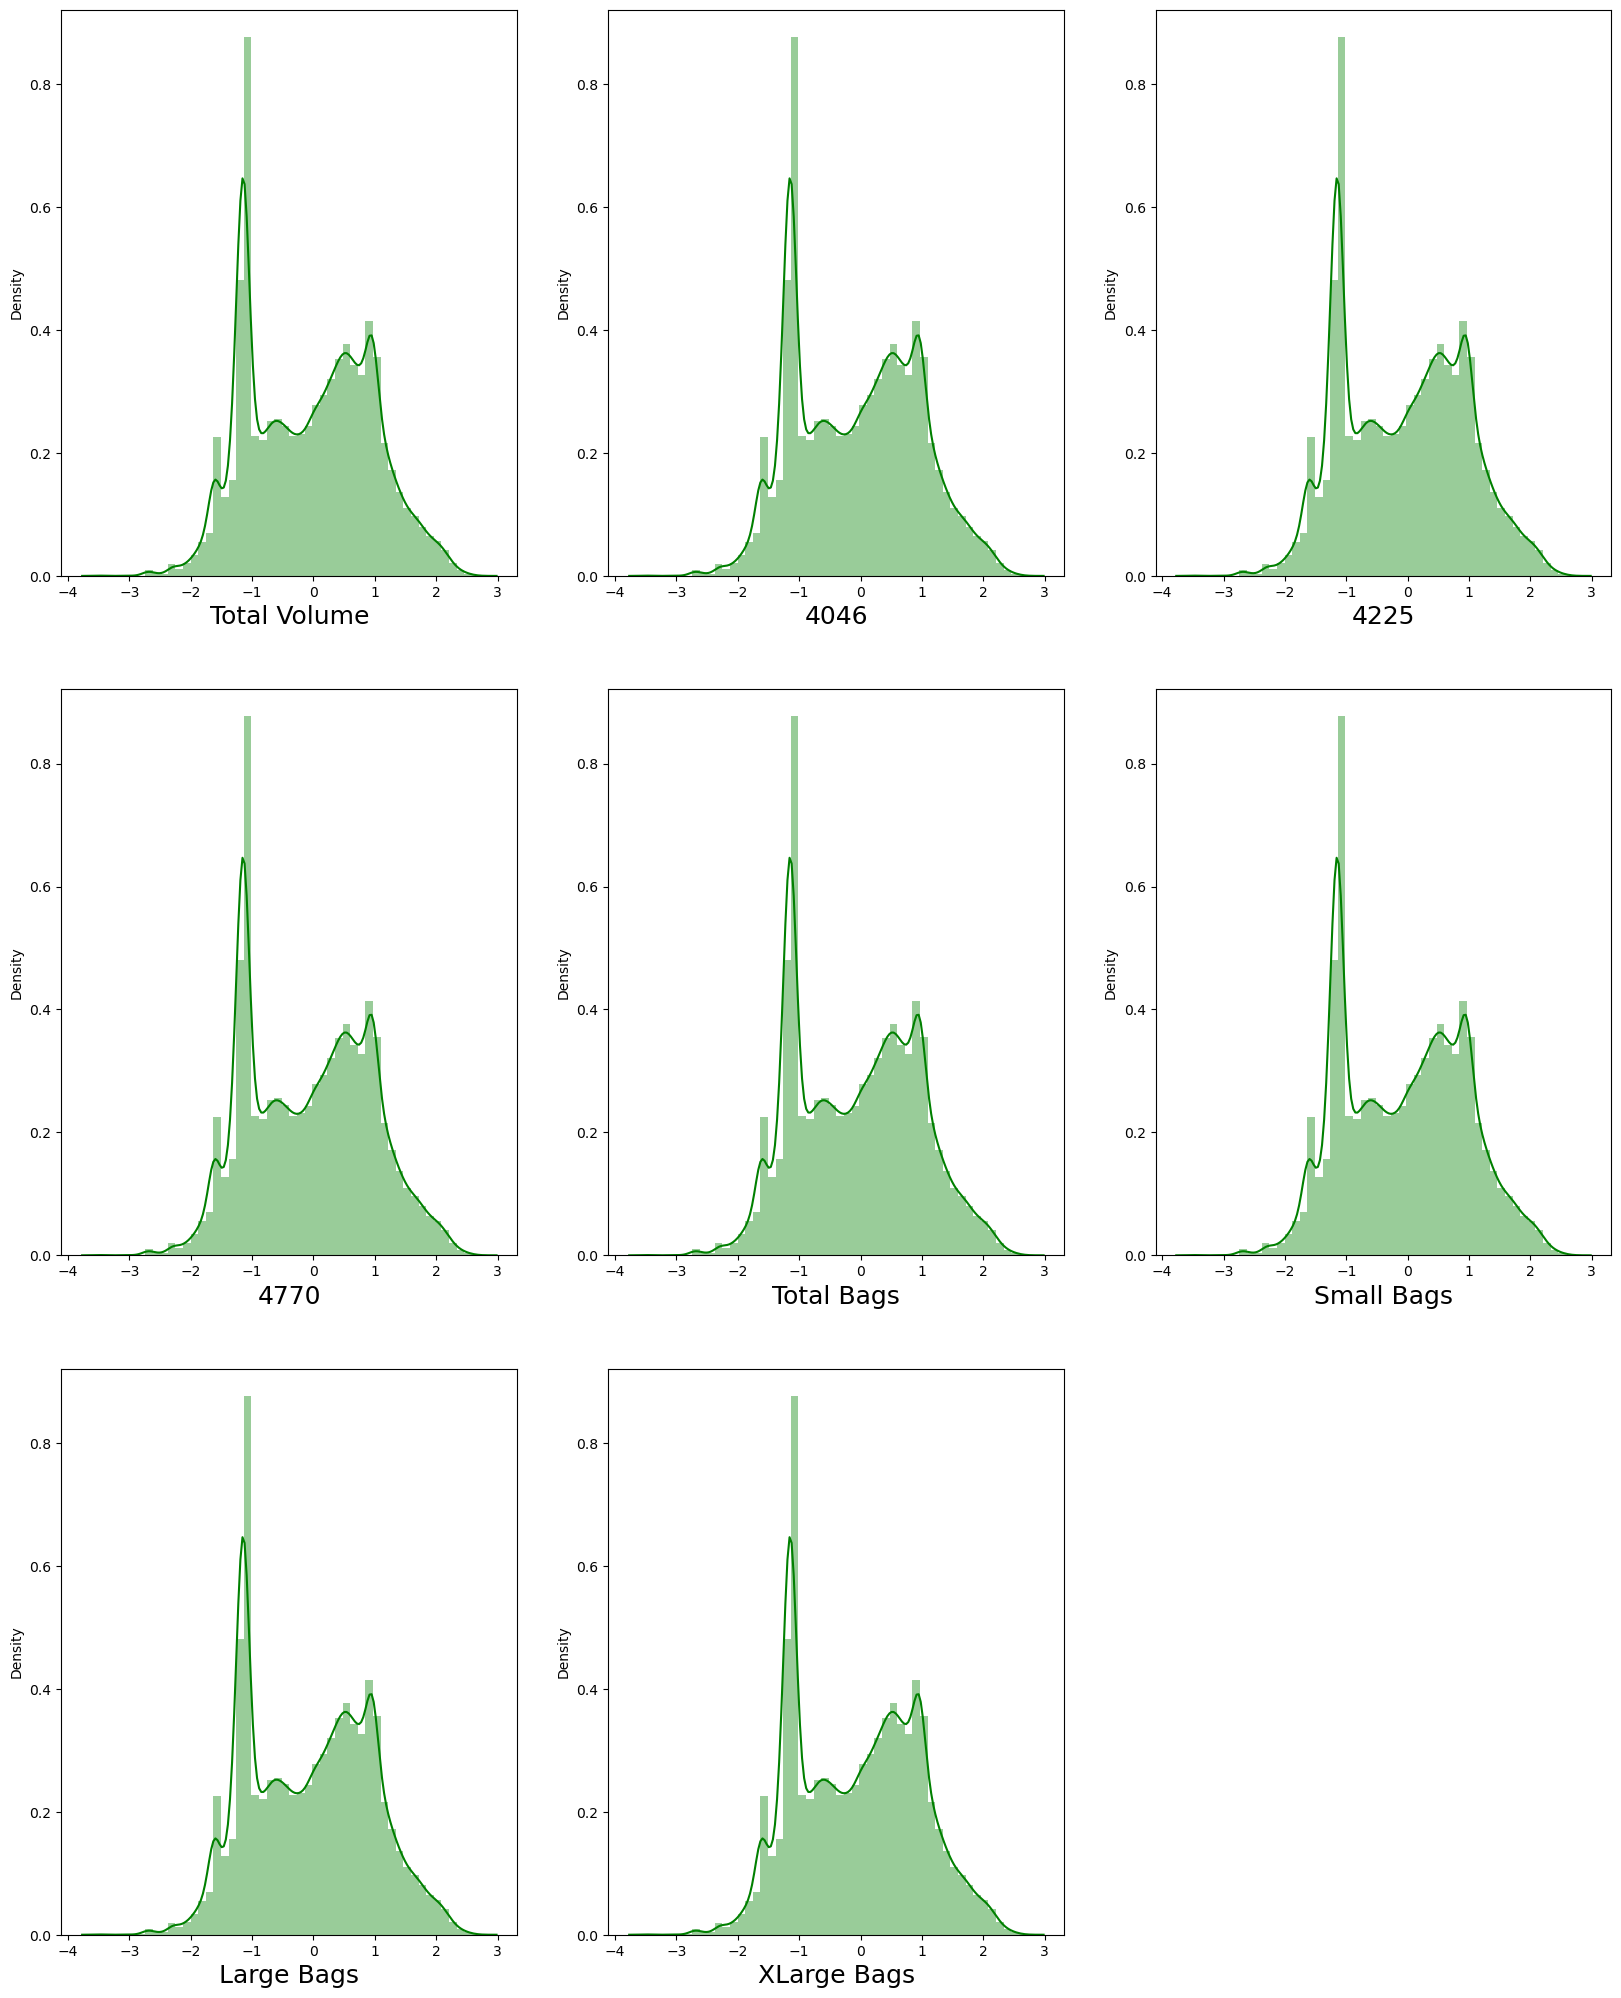

In [62]:
# Checking the data distribution in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[features],color='g')
        plt.xlabel(col,fontsize=18)
    plotnumber+=1
plt.show()

Now the data looks normal comparatively to previous one and the skewness has been removed.

### Encoding the Categorical data using LabelEncoder

In [63]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['type','region']
lbl = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(lbl.fit_transform)

In [64]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7,1,53
8,1,53
9,1,53
10,1,53


#### Correlation

In [65]:
# Checking Correlation of data with each other
new_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


This gives the correlation between dependent and independent variables.

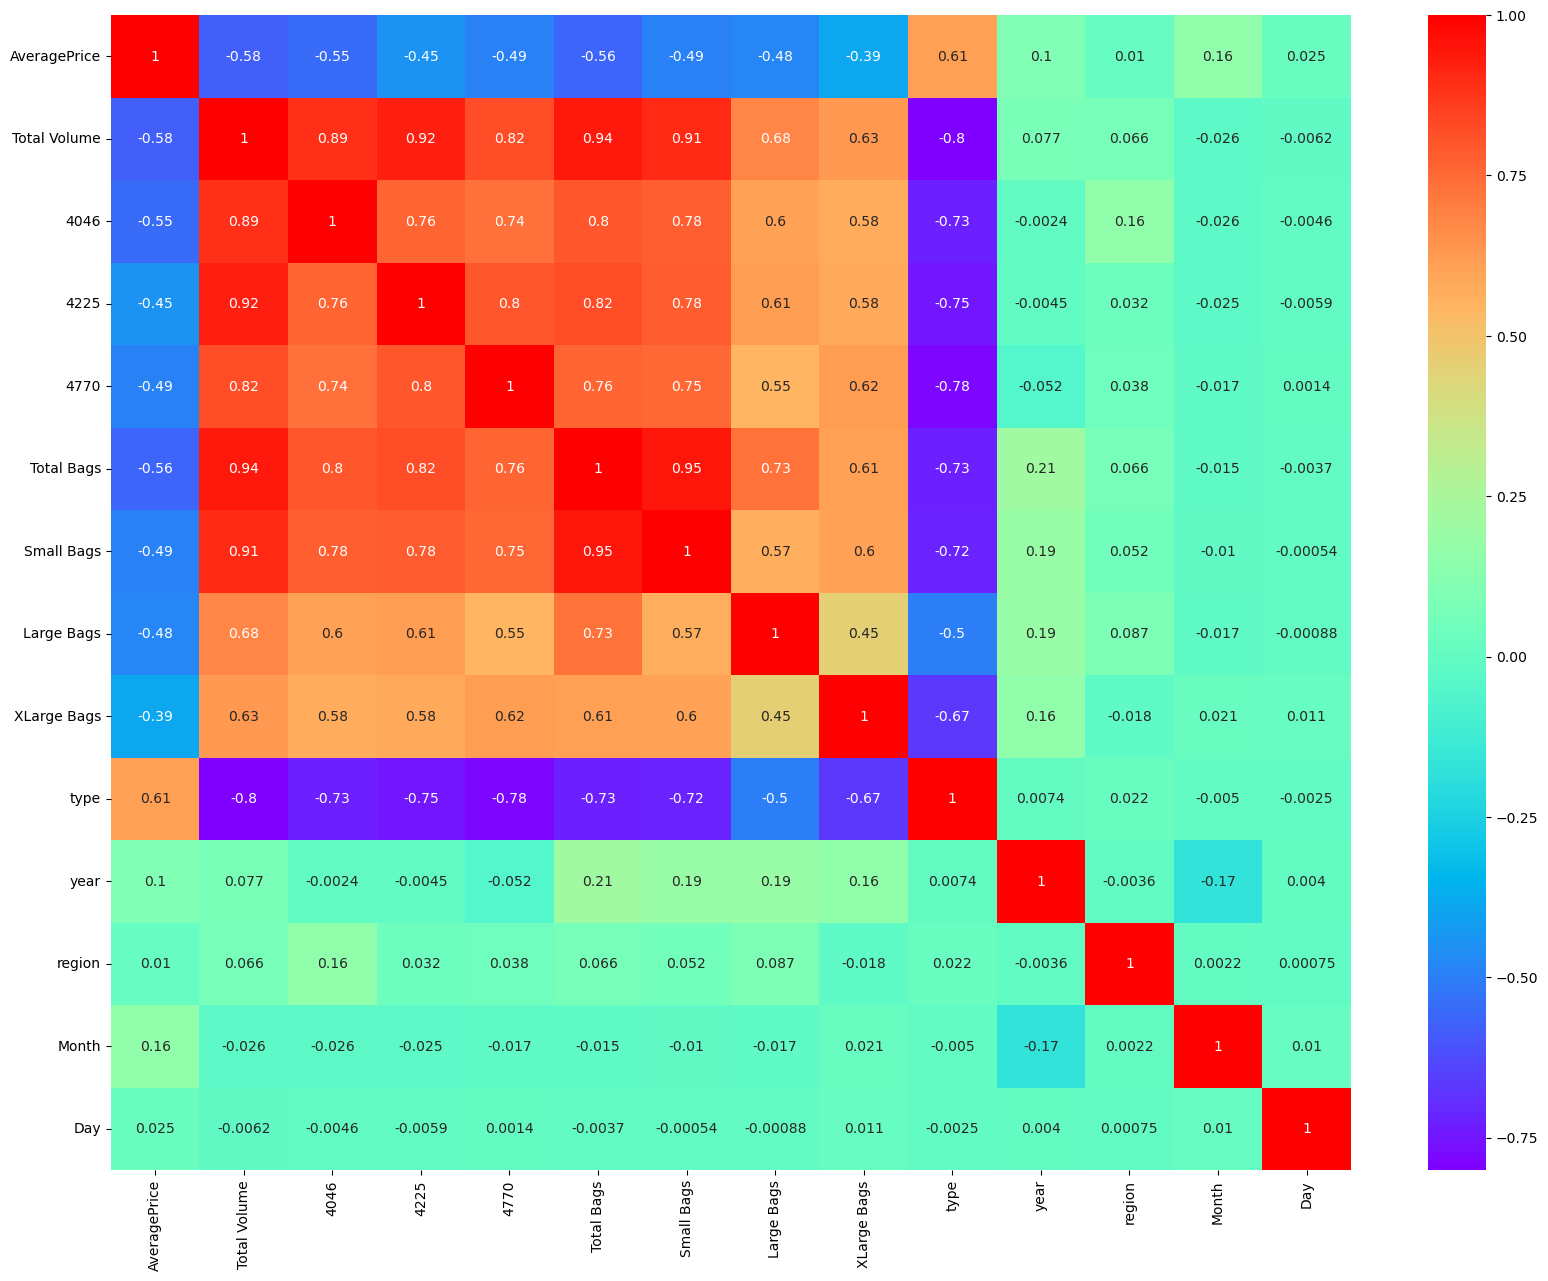

In [67]:
#visualizing corr values
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),annot=True, cmap='rainbow')
plt.show()

The heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature with another. This heatmap contains both positive and negative correlation.

* Almost all features are highly negatively correlated with the target variable and few columns year, month andtype have positive coorelation with the target.
* The features Day and the region has no relation with the target,so we can drop these columns.
* Almost all the features are correlated with each other which lead to multicolinearity problem which can be resolved using VIF.
* Also most of the columns have no correlation with each other and have zero correlation

##### Visualizing the correaltion between label and features using bar plot

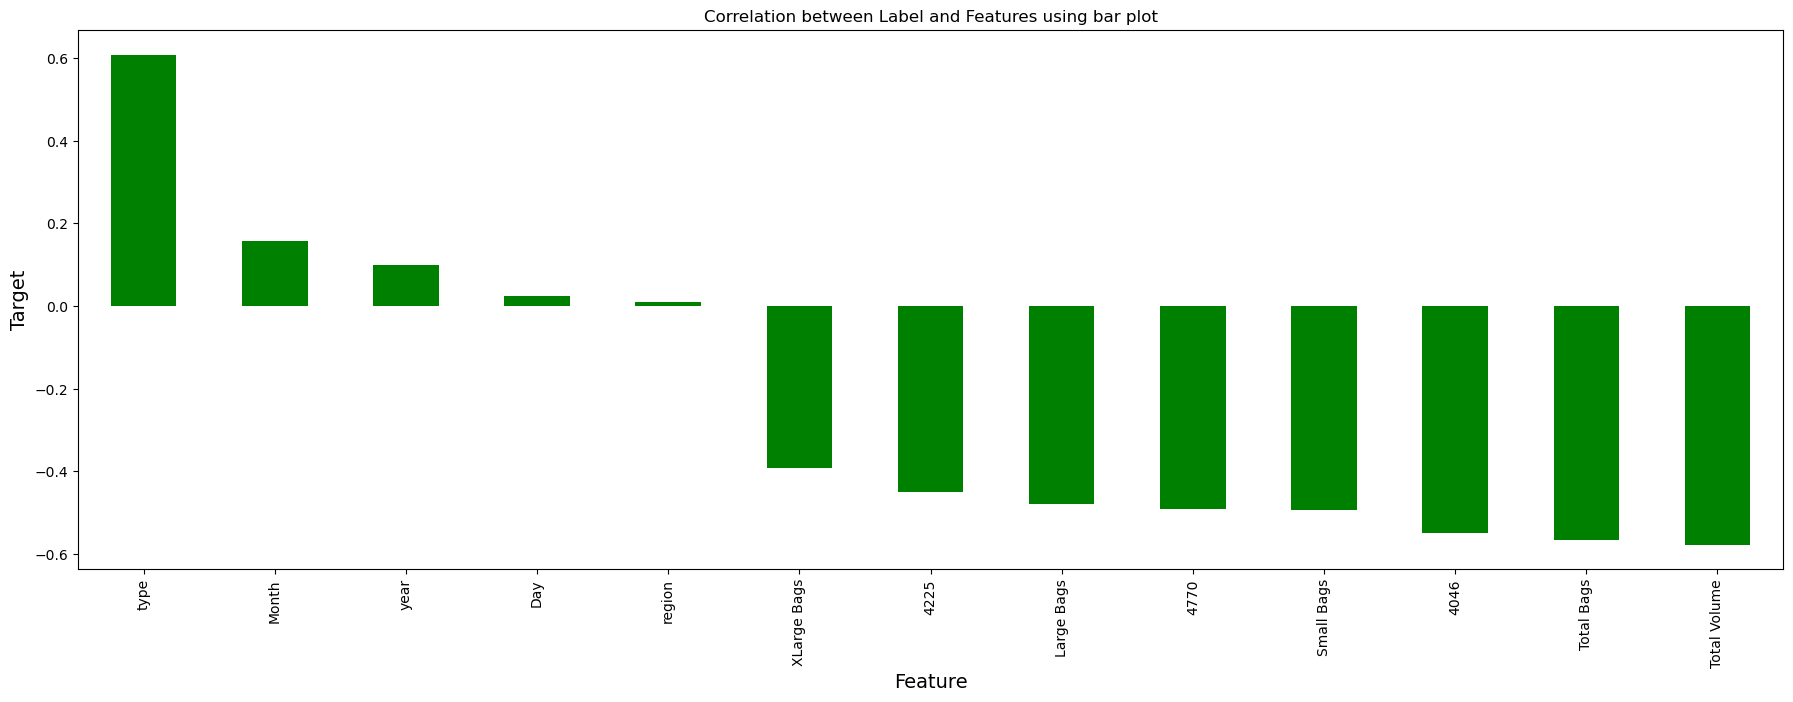

In [68]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()

The features Day and region has very less correlation with the target so we can drop these colums.

In [69]:
# Dropping irrelavent columns
new_df.drop('region',axis=1,inplace=True)
new_df.drop('Day',axis=1,inplace=True)

In [70]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


### Feature engineering

In [71]:
# Seperating features and Label
x = new_df.drop('AveragePrice',axis=1)
y = new_df['AveragePrice']

In [72]:
# looking shape of all features and model
print("Shape of Feature", x.shape)
print("Shape of Label for regression model", y.shape)

Shape of Feature (17782, 11)
Shape of Label for regression model (17782,)


In [73]:
# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706


In [74]:
# Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Freatures']=x.columns
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Freatures,VIF Values
0,Total Volume,51.806476
1,4046,6.808776
2,4225,11.158951
3,4770,3.951861
4,Total Bags,34.441003
5,Small Bags,16.630696
6,Large Bags,3.462408
7,XLarge Bags,2.065369
8,type,3.720176
9,year,1.386160


The vif value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. Removing the vif having highest vif value

In [75]:
# droping Total Volume Column
x.drop('Total Volume', axis=1, inplace=True)
x

,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706
...,...,...,...,...,...,...,...,...,...,...
17777,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-1.185845
17778,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.468572
17779,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.468572
17780,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.468572


In [76]:
# Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Freatures']=x.columns
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Freatures,VIF Values
0,4046,3.546068
1,4225,4.272321
2,4770,3.936681
3,Total Bags,24.479948
4,Small Bags,16.630524
5,Large Bags,3.419283
6,XLarge Bags,2.053729
7,type,3.487456
8,year,1.383630
9,Month,1.051817


now Vif value is comperatively high in Total Bags Column. Hence we need to drop that column

In [77]:
# droping total Bags column
x.drop('Total Bags', inplace=True, axis=1)

In [78]:
# Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Freatures']=x.columns
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Freatures,VIF Values
0,4046,3.527072
1,4225,4.127765
2,4770,3.936426
3,Small Bags,4.098464
4,Large Bags,1.864199
5,XLarge Bags,2.053482
6,type,3.484298
7,year,1.359151
8,Month,1.051183


Now finally vif values for all column is less than 10 . Hence There is no multicolinearity.

## Model Preparation

In [79]:
# importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [80]:
# Finding the best Random State
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print(f"Maximum r2score is {maxAccu} is at {maxRS}")

Maximum r2score is 0.5254304412980718 is at 140


In [81]:
#Spliting the dataset into train data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)
print(f"The shape of training data is {x_train.shape} and \nThe shape of test data is {x_test.shape}.")

The shape of training data is (12447, 9) and 
The shape of test data is (5335, 9).


#### Linear Regression

In [82]:
# Linear Regressor
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print(lr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_lr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_lr)))
print("r squared score=",r2_score(y_test,pred_lr))

LinearRegression()
Mean Absolute Error= 0.21648067683893116
Mean Squared Error= 0.07770399034868353
Root Mean Squared Error= 0.2787543548515135
r squared score= 0.5254304412980718


#### Lasso

In [83]:
# Lasso regularization
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print(ls)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_ls))
print("Mean Squared Error=", mean_squared_error(y_test,pred_ls))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_ls)))
print("r squared score=",r2_score(y_test,pred_ls))

Lasso()
Mean Absolute Error= 0.3286525139129741
Mean Squared Error= 0.16373576321766453
Root Mean Squared Error= 0.40464275999659816
r squared score= -2.386653099595293e-07


#### Ridge Model

In [84]:
# Ridge Regularization
rg=Ridge()
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
print(rg)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_rg))
print("Mean Squared Error=", mean_squared_error(y_test,pred_rg))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_rg)))
print("r squared score=",r2_score(y_test,pred_rg))

Ridge()
Mean Absolute Error= 0.2164793035760073
Mean Squared Error= 0.07770420192130423
Root Mean Squared Error= 0.2787547343477851
r squared score= 0.5254291491388816


#### Gradient Boosting Regressor

In [85]:
# Gradient Boosting regressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print(gbr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_gbr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_gbr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_gbr)))
print("r squared score=",r2_score(y_test,pred_gbr))

GradientBoostingRegressor()
Mean Absolute Error= 0.16153788211163952
Mean Squared Error= 0.04536350318340478
Root Mean Squared Error= 0.2129870962838002
r squared score= 0.7229468192004291


#### Random Forest Regressor

In [86]:
# Random Forest Regressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print(rfr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_rfr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_rfr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_rfr)))
print("r squared score=",r2_score(y_test,pred_rfr))

RandomForestRegressor()
Mean Absolute Error= 0.1028707216494845
Mean Squared Error= 0.02241059972071227
Root Mean Squared Error= 0.14970170246430825
r squared score= 0.8631294432630876


##### Extra Trees Regressor

In [90]:
# Extra Trees Regressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
print(etr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_etr)))
print("r squared score=",r2_score(y_test,pred_etr))

ExtraTreesRegressor()
Mean Absolute Error= 0.09089756326148077
Mean Squared Error= 0.017620392384254918
Root Mean Squared Error= 0.13274182605439372
r squared score= 0.8923851683751741


#### Ada Boost Regressor

In [88]:
# Ada Boost Regressor
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
pred_adr=adr.predict(x_test)
print(adr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_adr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_adr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_adr)))
print("r squared score=",r2_score(y_test,pred_adr))

AdaBoostRegressor()
Mean Absolute Error= 0.21449199167717145
Mean Squared Error= 0.07029397133736978
Root Mean Squared Error= 0.2651301026616363
r squared score= 0.5706864112475178


#### Decision Tree Regression

In [89]:
# Decision Tree Regressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print(dtr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_dtr)))
print("r squared score=",r2_score(y_test,pred_dtr))

DecisionTreeRegressor()
Mean Absolute Error= 0.13748828491096532
Mean Squared Error= 0.04546909090909091
Root Mean Squared Error= 0.21323482574169472
r squared score= 0.7223019524418708


##### KNeighborsRegressor

In [91]:
# KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_knn))
print("Mean Squared Error=", mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_knn)))
print("r squared score=",r2_score(y_test,pred_knn))

KNeighborsRegressor()
Mean Absolute Error= 0.1077315838800375
Mean Squared Error= 0.024101908153701966
Root Mean Squared Error= 0.15524789259021188
r squared score= 0.8527999416110998


##### SVR

In [92]:
# SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print(svr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_svr)))
print("r squared score=",r2_score(y_test,pred_svr))

SVR()
Mean Absolute Error= 0.13908858939440072
Mean Squared Error= 0.03654368461008696
Root Mean Squared Error= 0.19116402540772925
r squared score= 0.7768130027694873


From all of the model we have got the best r2score in ExtraTreesRegressor. Hence we need to perform hyper parameter tuning for this model.

## Hyper Parameter Tuning

In [106]:
# Hyper parameter Tuning for ExtraTreesRegressor
parameter={'n_estimators':[10,50,100], 
           "max_depth":[2,8,16,32,50],
           'min_samples_split': [2,4,6],
           'min_samples_leaf': [1,2],
           'max_features': ['auto','sqrt','log2'], 
           "random_state":[10,50,100]}
gsv=RandomizedSearchCV(ExtraTreesRegressor(),parameter,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'random_state': 10,
 'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50}

In [107]:
# Final model selection 
final_model=ExtraTreesRegressor(n_estimators=50, max_features='auto', max_depth=50, min_samples_split=4, min_samples_leaf=2, random_state=10)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred))
print("Mean Squared Error =",mean_squared_error(y_test,pred))
print("Root Mean Squared Error =", np.sqrt(mean_squared_error(y_test,pred)))
print("R Squared Score", r2_score(y_test,pred))

Mean Absolute Error= 0.09775799527542123
Mean Squared Error = 0.019744113497004574
Root Mean Squared Error = 0.14051374842699405
R Squared Score 0.879414748365069


r2score of this model has not increased after hyperparameter tuning.

In [108]:
#Saving The best performing model
import joblib
joblib.dump(final_model,"avocado_regression.pkl")

['avocado_regression.pkl']

In [109]:
# Loading the model and predicting values
load_model=joblib.load("avocado_regression.pkl")
prediction=load_model.predict(x_test)
check_df=pd.DataFrame()
check_df['Actual Value']=y_test
check_df["Predicted Value"]= prediction
check_df

,Actual Value,Predicted Value
37,0.76,0.770667
10,0.98,0.931080
29,0.96,1.041652
22,1.85,1.611757
20,1.37,1.370840
...,...,...
11,1.17,1.306300
12,1.22,1.222400
21,1.68,1.725050
7,0.87,1.023150


<AxesSubplot:xlabel='Actual Value', ylabel='Predicted Value'>

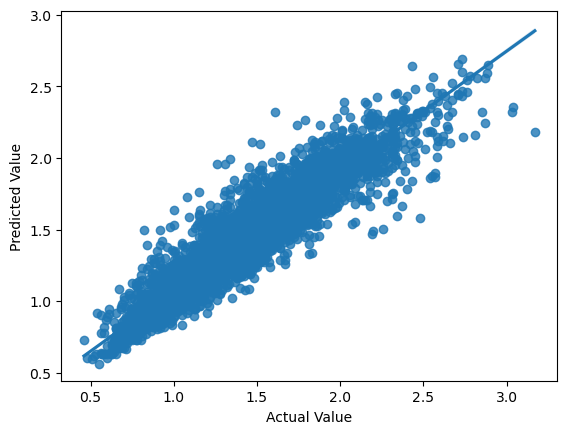

In [112]:
# Visualizing the final model
sns.regplot(data=check_df, x="Actual Value", y='Predicted Value')

The regrasion plot shows us the actual value vs predicted value and the bestfit line shows that data is corellated to each other. hence the model is performing well.

## Task 2 Classification problem

In [130]:
df_region =pd.read_csv('avocado.csv')
df_region

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [131]:
# List of values in the target column
df_region['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [132]:
# Checking the uniqueness of the target variable
df_region['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [133]:
#Label encoding the target column
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df_region['region'] = lbl.fit_transform(df_region['region'])

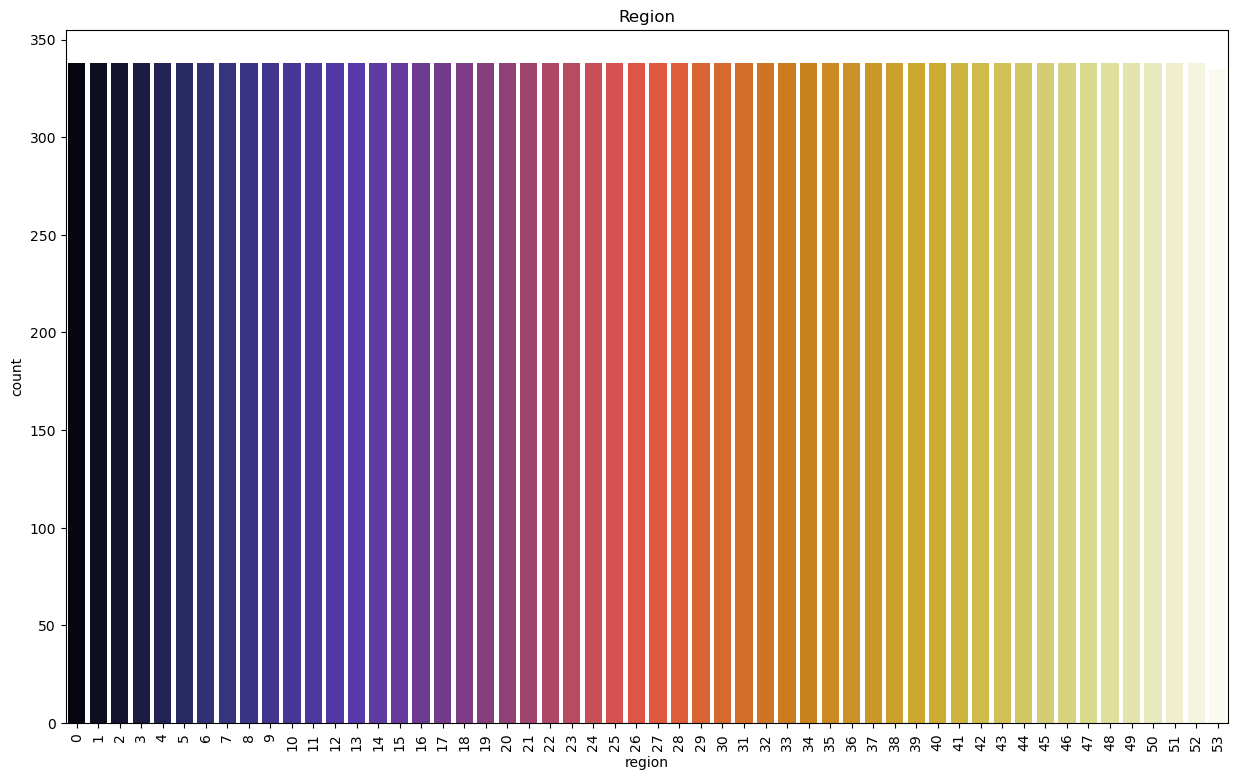

In [134]:
# Visualizing the region
plt.figure(figsize=(15,9))
sns.countplot(df_region['region'],palette="CMRmap")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

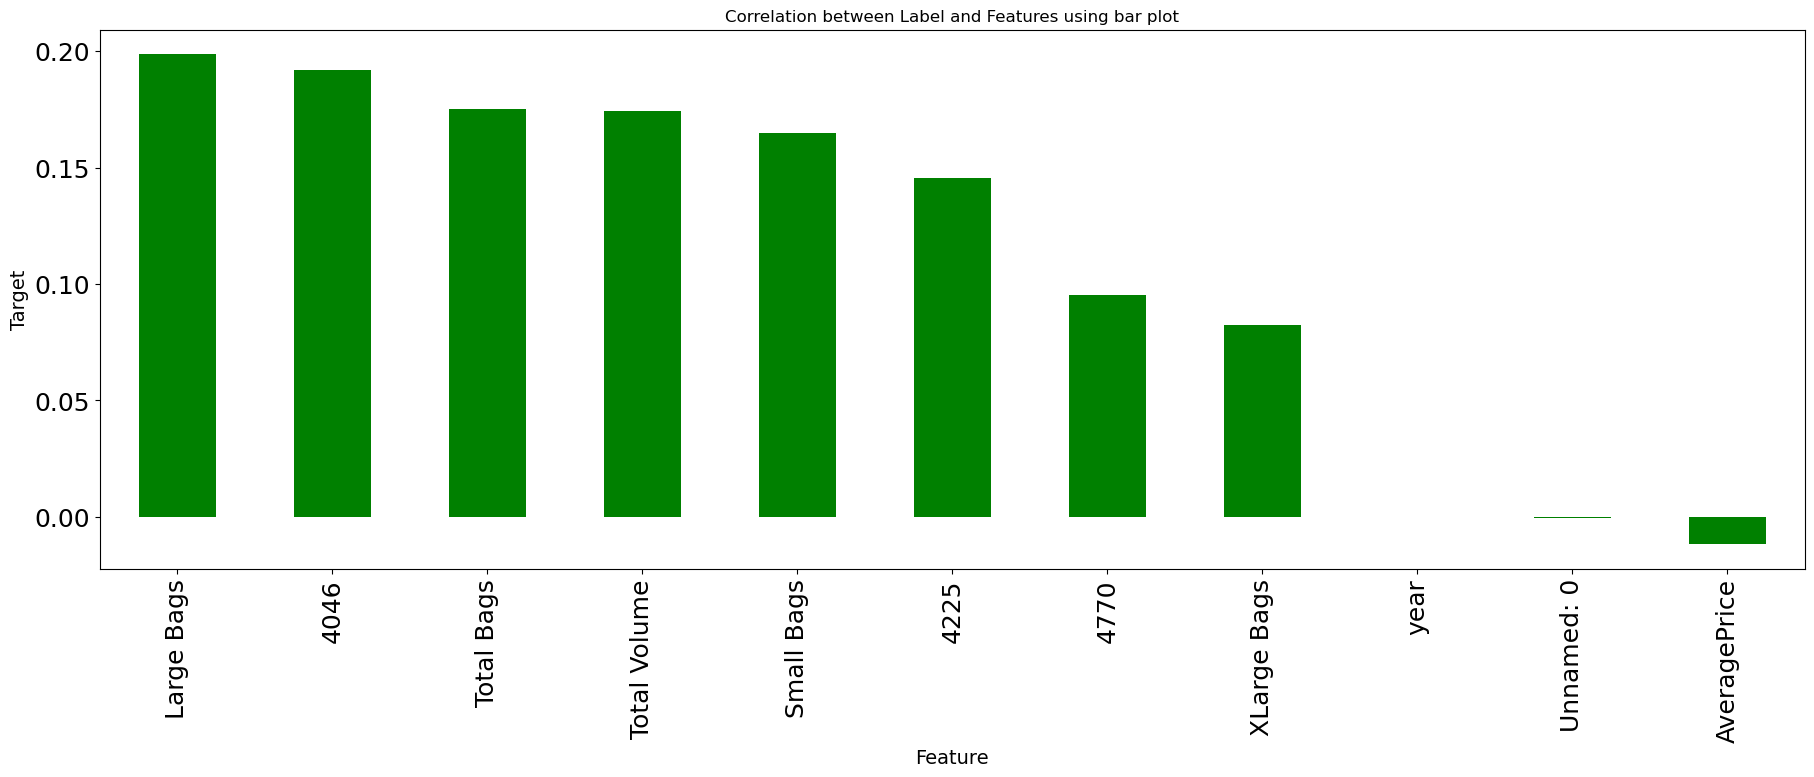

In [135]:
plt.figure(figsize=(22,7))
df_region.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='g',fontsize=18)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()

In [136]:
# Dropping the unnamed column
df_region.drop("Unnamed: 0",axis=1,inplace=True)
# Dropping the year column
df_region.drop("year",axis=1,inplace=True)

As we have already visualized the dataset and have seen the description and correlation of region with all other variables, we can proceed further.

In [137]:
# Changing date column from object type to Date type
df_region['Date'] = pd.to_datetime(df_region['Date'])

df_region['Month'] = df_region['Date'].dt.month

df_region['Day'] = df_region['Date'].dt.day

In [138]:
df_region.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,11,29


Now we have separated Month and Day from Date column and now the column Date is no use,so dropping it.

In [139]:
# Dropping the Date column
df_region.drop("Date",axis=1,inplace=True)

In [140]:
df_region.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,11,29


In [141]:
# LabelEncoding the type column
df_region['type']= lbl.fit_transform(df_region['type'])

In [142]:
# Splitting the independent and dependent columns

x = df_region.drop(['region'], axis =1)
y = df_region['region']

In [143]:
print("Shape of Features",x.shape)
print("Shape of Label",y.shape)

Shape of Features (18249, 12)
Shape of Label (18249,)


#### Standard Scalarization

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.99983562,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.99983562,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.99983562,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.00016441,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.00016441,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.00016441,
        -1.46495942, -0.98707516]])

### Finding best random state:

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)


The best accuracy is  0.3304109589041096  on Random_State  199


In [146]:
# spliting the traing data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [147]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.3304109589041096
[[ 30   0   0 ...   0   0   0]
 [  5  26   0 ...   0   0   0]
 [  0   0  42 ...   0   0   0]
 ...
 [  0   0   0 ... 100   7   0]
 [  0   0   0 ...   1  61   0]
 [  1   1   0 ...   0   0  21]]
              precision    recall  f1-score   support

           0       0.18      0.32      0.23        95
           1       0.51      0.27      0.36        95
           2       0.62      0.43      0.51        97
           3       0.07      0.34      0.11        94
           4       0.44      0.23      0.30       101
           5       0.31      0.23      0.27        96
           6       0.73      0.58      0.64       102
           7       0.16      0.32      0.21        94
           8       0.46      0.46      0.46       113
           9       0.27      0.51      0.35        92
          10       0.16      0.18      0.17        99
          11       0.20      0.55      0.29        96
          12       0.51      0.36      0.42       109
          13       0.74      0.2

In [148]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8942465753424658
[[ 85   0   0 ...   0   0   0]
 [  0  85   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   1 104   0]
 [  0   1   0 ...   0   0  84]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        95
           1       0.79      0.89      0.84        95
           2       0.93      0.99      0.96        97
           3       0.84      0.84      0.84        94
           4       0.91      0.88      0.89       101
           5       0.88      0.79      0.84        96
           6       0.97      0.98      0.98       102
           7       0.94      0.93      0.93        94
           8       0.97      0.96      0.96       113
           9       0.91      0.87      0.89        92
          10       0.79      0.92      0.85        99
          11       0.98      0.91      0.94        96
          12       0.97      0.88      0.92       109
          13       0.83      0.8

In [149]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7669406392694064
[[ 74   0   0 ...   0   0   0]
 [  0  68   0 ...   0   0   1]
 [  0   0  85 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   1  98   0]
 [  0   2   1 ...   0   0  63]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        95
           1       0.62      0.72      0.67        95
           2       0.89      0.88      0.88        97
           3       0.70      0.81      0.75        94
           4       0.74      0.80      0.77       101
           5       0.73      0.72      0.73        96
           6       0.94      0.98      0.96       102
           7       0.81      0.79      0.80        94
           8       0.93      0.92      0.92       113
           9       0.78      0.73      0.75        92
          10       0.65      0.60      0.62        99
          11       0.84      0.80      0.82        96
          12       0.84      0.75      0.79       109
          13       0.72      0.6

In [150]:
# SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.228675799086758
[[ 4  0  1 ...  0  0  0]
 [ 6 16  2 ...  0  0  5]
 [ 3  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  1  0]
 [ 0  0  0 ...  1 53  0]
 [ 3  7  2 ...  0  0 24]]
              precision    recall  f1-score   support

           0       0.02      0.04      0.03        95
           1       0.31      0.17      0.22        95
           2       0.25      0.42      0.32        97
           3       0.00      0.00      0.00        94
           4       0.35      0.13      0.19       101
           5       0.07      0.25      0.11        96
           6       0.92      0.47      0.62       102
           7       0.07      0.02      0.03        94
           8       0.96      0.47      0.63       113
           9       0.47      0.18      0.27        92
          10       0.05      0.07      0.06        99
          11       0.15      0.65      0.25        96
          12       0.80      0.33      0.47       109
          13       0.81      0.23      0.36       107
          14   

In [152]:
# Hyper Parameter Tuning
parameters={"n_estimators":[10,100,500],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500, 'max_features': 'auto', 'criterion': 'gini'}

In [154]:
#Finding the best model
final_model_cls=RandomForestClassifier(criterion='gini', max_features='auto', n_estimators=500)
final_model_cls.fit(x_train,y_train)
pred=final_model_cls.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.64383561643837


Model performance has been improved after hyper parameter tuning.

In [160]:
#Saving The best performing model
import joblib
joblib.dump(final_model_cls,"avocado_classification.pkl")

['avocado_classification.pkl']

# Thank You